In [1]:
#tweet cleaning
#https://www.kaggle.com/ragnisah/text-data-cleaning-tweets-analysis
#https://towardsdatascience.com/basic-data-cleaning-engineering-session-twitter-sentiment-data-95e5bd2869ec

#Topic Modeilling
#https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

#Cleaning
#Puncuation
#lower case
#stopwords
#abbreviations

# Importing modules
import pandas as pd
import os

# Load the regular expression library
import re

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk as nltk
nltk.download('stopwords')
nltk.download('wordnet')
import gensim
from gensim.utils import simple_preprocess
from gensim.models.wrappers import LdaMallet
from nltk.corpus import stopwords
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import pyLDAvis.gensim
import pickle 
import pyLDAvis
#import spacy
#from scispacy.abbreviation import AbbreviationDetector

#sentiment analysis
#https://medium.com/swlh/simple-sentiment-analysis-for-nlp-beginners-and-everyone-else-using-vader-and-textblob-728da3dbe33d
import sqlite3
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\megha\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [2]:
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\Users\megha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
the_office = pd.read_csv('the-office_lines.csv')
the_office

Unnamed: 0 Character  \
0               0   Michael   
1               1       Jim   
2               2   Michael   
3               3       Jim   
4               4   Michael   
...           ...       ...   
58716       61302     Creed   
58717       61303  Meredith   
58718       61304   Phyllis   
58719       61305       Jim   
58720       61306       Pam   

                                                                                                      Line  \
0                           All right Jim. Your quarterlies look very good. How are things at the library?   
1                                                                 Oh, I told you. I couldn’t close it. So…   
2                      So you’ve come to the master for guidance? Is this what you’re saying, grasshopper?   
3                                                               Actually, you called me in here, but yeah.   
4                                                        All right. Well, let me show you how it’s done.     
...                                                                                                    ...   
58716   It all seems so very arbitrary. I applied for a job at this company because they were hiring. I...   
58717   I just feel lucky that I got a chance to share my crummy story with anyone out there who thinks...   
58718   I’m happy that this was all filmed so I can remember everyone and what we did. I worked for a p...   
58719   I sold paper at this company for 12 years. My job was to speak to clients on the phone about qu...   
58720   I thought it was weird when you picked us to make a documentary. But all in all…I think an ordi...   

       Season  Episode_Number  
0           1               1  
1           1               1  
2           1               1  
3           1               1  
4           1               1  
...       ...             ...  
58716       9              23  
58717       9              23  
58718       9              23  
58719       9              23  
58720       9              23  

[58721 rows x 5 columns]

In [4]:
columns = list(the_office)
columns

['Unnamed: 0', 'Character', 'Line', 'Season', 'Episode_Number']

In [5]:
#drop first column
the_office = the_office.drop(['Unnamed: 0'], axis=1)
the_office

Character  \
0       Michael   
1           Jim   
2       Michael   
3           Jim   
4       Michael   
...         ...   
58716     Creed   
58717  Meredith   
58718   Phyllis   
58719       Jim   
58720       Pam   

                                                                                                      Line  \
0                           All right Jim. Your quarterlies look very good. How are things at the library?   
1                                                                 Oh, I told you. I couldn’t close it. So…   
2                      So you’ve come to the master for guidance? Is this what you’re saying, grasshopper?   
3                                                               Actually, you called me in here, but yeah.   
4                                                        All right. Well, let me show you how it’s done.     
...                                                                                                    ...   
58716   It all seems so very arbitrary. I applied for a job at this company because they were hiring. I...   
58717   I just feel lucky that I got a chance to share my crummy story with anyone out there who thinks...   
58718   I’m happy that this was all filmed so I can remember everyone and what we did. I worked for a p...   
58719   I sold paper at this company for 12 years. My job was to speak to clients on the phone about qu...   
58720   I thought it was weird when you picked us to make a documentary. But all in all…I think an ordi...   

       Season  Episode_Number  
0           1               1  
1           1               1  
2           1               1  
3           1               1  
4           1               1  
...       ...             ...  
58716       9              23  
58717       9              23  
58718       9              23  
58719       9              23  
58720       9              23  

[58721 rows x 4 columns]

In [6]:
#select only certain characters
#To select rows whose column value is in an iterable array, which we'll define as array, you can use isin:
characters = ['Michael', 'Dwight', 'Jim', 'Pam', 'Angela']
the_office = the_office.loc[the_office['Character'].isin(characters)]
the_office

Character  \
0       Michael   
1           Jim   
2       Michael   
3           Jim   
4       Michael   
...         ...   
58701       Jim   
58703       Jim   
58705    Angela   
58719       Jim   
58720       Pam   

                                                                                                      Line  \
0                           All right Jim. Your quarterlies look very good. How are things at the library?   
1                                                                 Oh, I told you. I couldn’t close it. So…   
2                      So you’ve come to the master for guidance? Is this what you’re saying, grasshopper?   
3                                                               Actually, you called me in here, but yeah.   
4                                                        All right. Well, let me show you how it’s done.     
...                                                                                                    ...   
58701   Imagine going back and watching a tape of your life. You could see yourself change and make mis...   
58703                                                                                       Thanks Phyl.     
58705                                                                       Do you even have a mattress?     
58719   I sold paper at this company for 12 years. My job was to speak to clients on the phone about qu...   
58720   I thought it was weird when you picked us to make a documentary. But all in all…I think an ordi...   

       Season  Episode_Number  
0           1               1  
1           1               1  
2           1               1  
3           1               1  
4           1               1  
...       ...             ...  
58701       9              23  
58703       9              23  
58705       9              23  
58719       9              23  
58720       9              23  

[32806 rows x 4 columns]

In [7]:
#only go up to season 7
the_office = the_office.loc[the_office['Season'] <= 7]
the_office

Character  \
0       Michael   
1           Jim   
2       Michael   
3           Jim   
4       Michael   
...         ...   
44596       Jim   
44598       Jim   
44606    Dwight   
44608       Pam   
44610       Pam   

                                                                                                      Line  \
0                           All right Jim. Your quarterlies look very good. How are things at the library?   
1                                                                 Oh, I told you. I couldn’t close it. So…   
2                      So you’ve come to the master for guidance? Is this what you’re saying, grasshopper?   
3                                                               Actually, you called me in here, but yeah.   
4                                                        All right. Well, let me show you how it’s done.     
...                                                                                                    ...   
44596                                             I don’t know. This conversation really got away from me.   
44598    No, they can’t. That’s not how this is gonna work. [exhales] We’re going in this room, we’re g...   
44606    I will run this branch, or I will destroy this branch, or… [shrugs] I don’t know. Something al...   
44608                                                  [in high-pitched, damsel-like voice] Is that right?   
44610                                                                                          Well, okay!   

       Season  Episode_Number  
0           1               1  
1           1               1  
2           1               1  
3           1               1  
4           1               1  
...       ...             ...  
44596       7              24  
44598       7              24  
44606       7              24  
44608       7              24  
44610       7              24  

[27403 rows x 4 columns]

In [8]:
#remove any blank texts
the_office = the_office[the_office['Line'].notna()]
the_office

Character  \
0       Michael   
1           Jim   
2       Michael   
3           Jim   
4       Michael   
...         ...   
44596       Jim   
44598       Jim   
44606    Dwight   
44608       Pam   
44610       Pam   

                                                                                                      Line  \
0                           All right Jim. Your quarterlies look very good. How are things at the library?   
1                                                                 Oh, I told you. I couldn’t close it. So…   
2                      So you’ve come to the master for guidance? Is this what you’re saying, grasshopper?   
3                                                               Actually, you called me in here, but yeah.   
4                                                        All right. Well, let me show you how it’s done.     
...                                                                                                    ...   
44596                                             I don’t know. This conversation really got away from me.   
44598    No, they can’t. That’s not how this is gonna work. [exhales] We’re going in this room, we’re g...   
44606    I will run this branch, or I will destroy this branch, or… [shrugs] I don’t know. Something al...   
44608                                                  [in high-pitched, damsel-like voice] Is that right?   
44610                                                                                          Well, okay!   

       Season  Episode_Number  
0           1               1  
1           1               1  
2           1               1  
3           1               1  
4           1               1  
...       ...             ...  
44596       7              24  
44598       7              24  
44606       7              24  
44608       7              24  
44610       7              24  

[27403 rows x 4 columns]

In [9]:
#remove posts with less than 5 words
word_count = the_office['Line'].str.split().str.len()
~(word_count < 5)

0         True
1         True
2         True
3         True
4         True
         ...  
44596     True
44598     True
44606     True
44608     True
44610    False
Name: Line, Length: 27403, dtype: bool

In [10]:
the_office = the_office [~(word_count < 5)]
the_office

Character  \
0       Michael   
1           Jim   
2       Michael   
3           Jim   
4       Michael   
...         ...   
44594       Jim   
44596       Jim   
44598       Jim   
44606    Dwight   
44608       Pam   

                                                                                                      Line  \
0                           All right Jim. Your quarterlies look very good. How are things at the library?   
1                                                                 Oh, I told you. I couldn’t close it. So…   
2                      So you’ve come to the master for guidance? Is this what you’re saying, grasshopper?   
3                                                               Actually, you called me in here, but yeah.   
4                                                        All right. Well, let me show you how it’s done.     
...                                                                                                    ...   
44594                                                                       What? No, no, it’s not a vote.   
44596                                             I don’t know. This conversation really got away from me.   
44598    No, they can’t. That’s not how this is gonna work. [exhales] We’re going in this room, we’re g...   
44606    I will run this branch, or I will destroy this branch, or… [shrugs] I don’t know. Something al...   
44608                                                  [in high-pitched, damsel-like voice] Is that right?   

       Season  Episode_Number  
0           1               1  
1           1               1  
2           1               1  
3           1               1  
4           1               1  
...       ...             ...  
44594       7              24  
44596       7              24  
44598       7              24  
44606       7              24  
44608       7              24  

[18291 rows x 4 columns]

In [11]:
#view gensim stopwords
all_stopwords = gensim.parsing.preprocessing.STOPWORDS
print(all_stopwords)

frozenset({'anywhere', 'almost', 'which', 'for', 'go', 'already', 'us', 'most', 'whenever', 'former', 'who', 'when', 'with', 'kg', 'even', 'those', 'call', 'else', 'since', 'its', 'elsewhere', 'without', 'more', 'each', 'therefore', 'per', 'them', 'whereupon', 'mostly', 'fire', 'whoever', 'noone', 'take', 'while', 'of', 'you', 'been', 'moreover', 'alone', 'a', 'such', 'quite', 'doing', 'so', 'whereby', 'myself', 'hers', 'empty', 'does', 'not', 'or', 'system', 're', 'bottom', 'your', 'etc', 'anyone', 'before', 'perhaps', 'front', 'formerly', 'down', 'might', 'besides', 'below', 'done', 'always', 'don', 'whereafter', 'several', 'yours', 'to', 'i', 'were', 'around', 'my', 'once', 'and', 'yourself', 'had', 'somehow', 'themselves', 'used', 'someone', 'didn', 'thence', 'our', 'mill', 'really', 'again', 'anyway', 'only', 'enough', 'nowhere', 'serious', 'too', 'meanwhile', 'third', 'never', 'together', 'nothing', 'sincere', 'into', 'we', 'ourselves', 'name', 'her', 'hereupon', 'thereby', 'much

In [12]:
#stopword libraries https://stackabuse.com/removing-stop-words-from-strings-in-python/
#gensim stopwords
from gensim.parsing.preprocessing import remove_stopwords


#text = "Nick likes to play football, however he is not too fond of tennis."
#filtered_sentence = remove_stopwords(text)

#print(filtered_sentence)
#def remove_stopwords(text):
    #text = [word for word in text if word not in stopword]
    #print(text)
    #return text
    
#diabetes2018['text_nonstop'] = diabetes2018['text_tokenized'].apply(lambda x: remove_stopwords(x))
#diabetes2018.head(10)

the_office['text_gens_nonstop'] = the_office['Line'].apply(lambda x: remove_stopwords(x))
the_office

<ipython-input-12-265e3f3c4d12>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_office['text_gens_nonstop'] = the_office['Line'].apply(lambda x: remove_stopwords(x))


Character  \
0       Michael   
1           Jim   
2       Michael   
3           Jim   
4       Michael   
...         ...   
44594       Jim   
44596       Jim   
44598       Jim   
44606    Dwight   
44608       Pam   

                                                                                                      Line  \
0                           All right Jim. Your quarterlies look very good. How are things at the library?   
1                                                                 Oh, I told you. I couldn’t close it. So…   
2                      So you’ve come to the master for guidance? Is this what you’re saying, grasshopper?   
3                                                               Actually, you called me in here, but yeah.   
4                                                        All right. Well, let me show you how it’s done.     
...                                                                                                    ...   
44594                                                                       What? No, no, it’s not a vote.   
44596                                             I don’t know. This conversation really got away from me.   
44598    No, they can’t. That’s not how this is gonna work. [exhales] We’re going in this room, we’re g...   
44606    I will run this branch, or I will destroy this branch, or… [shrugs] I don’t know. Something al...   
44608                                                  [in high-pitched, damsel-like voice] Is that right?   

       Season  Episode_Number  \
0           1               1   
1           1               1   
2           1               1   
3           1               1   
4           1               1   
...       ...             ...   
44594       7              24   
44596       7              24   
44598       7              24   
44606       7              24   
44608       7              24   

                                                                                         text_gens_nonstop  
0                                           All right Jim. Your quarterlies look good. How things library?  
1                                                                 Oh, I told you. I couldn’t close it. So…  
2                                           So you’ve come master guidance? Is you’re saying, grasshopper?  
3                                                                             Actually, called here, yeah.  
4                                                                          All right. Well, let it’s done.  
...                                                                                                    ...  
44594                                                                             What? No, no, it’s vote.  
44596                                                         I don’t know. This conversation got away me.  
44598  No, can’t. That’s gonna work. [exhales] We’re going room, we’re going meeting. We’re gonna recom...  
44606             I run branch, I destroy branch, or… [shrugs] I don’t know. Something works out. [leaves]  
44608                                                       [in high-pitched, damsel-like voice] Is right?  

[18291 rows x 5 columns]

In [13]:
#Remove punctuations & upper case
#Remove stopwords
#Lammetization/stemming - Tranforming any form of a word to its root word
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
#remove puncutation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    text = text.replace("’", "")
    return text

the_office['text_processed'] = the_office['text_gens_nonstop'].apply(lambda x: remove_punct(x))
the_office

<ipython-input-14-e340f7b25b9e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_office['text_processed'] = the_office['text_gens_nonstop'].apply(lambda x: remove_punct(x))


Character  \
0       Michael   
1           Jim   
2       Michael   
3           Jim   
4       Michael   
...         ...   
44594       Jim   
44596       Jim   
44598       Jim   
44606    Dwight   
44608       Pam   

                                                                                                      Line  \
0                           All right Jim. Your quarterlies look very good. How are things at the library?   
1                                                                 Oh, I told you. I couldn’t close it. So…   
2                      So you’ve come to the master for guidance? Is this what you’re saying, grasshopper?   
3                                                               Actually, you called me in here, but yeah.   
4                                                        All right. Well, let me show you how it’s done.     
...                                                                                                    ...   
44594                                                                       What? No, no, it’s not a vote.   
44596                                             I don’t know. This conversation really got away from me.   
44598    No, they can’t. That’s not how this is gonna work. [exhales] We’re going in this room, we’re g...   
44606    I will run this branch, or I will destroy this branch, or… [shrugs] I don’t know. Something al...   
44608                                                  [in high-pitched, damsel-like voice] Is that right?   

       Season  Episode_Number  \
0           1               1   
1           1               1   
2           1               1   
3           1               1   
4           1               1   
...       ...             ...   
44594       7              24   
44596       7              24   
44598       7              24   
44606       7              24   
44608       7              24   

                                                                                         text_gens_nonstop  \
0                                           All right Jim. Your quarterlies look good. How things library?   
1                                                                 Oh, I told you. I couldn’t close it. So…   
2                                           So you’ve come master guidance? Is you’re saying, grasshopper?   
3                                                                             Actually, called here, yeah.   
4                                                                          All right. Well, let it’s done.   
...                                                                                                    ...   
44594                                                                             What? No, no, it’s vote.   
44596                                                         I don’t know. This conversation got away me.   
44598  No, can’t. That’s gonna work. [exhales] We’re going room, we’re going meeting. We’re gonna recom...   
44606             I run branch, I destroy branch, or… [shrugs] I don’t know. Something works out. [leaves]   
44608                                                       [in high-pitched, damsel-like voice] Is right?   

                                                                                            text_processed  
0                                              All right Jim Your quarterlies look good How things library  
1                                                                     Oh I told you I couldnt close it So…  
2                                                So youve come master guidance Is youre saying grasshopper  
3                                                                                Actually called here yeah  
4                                                                              All right Well let its done  
...                                                                                 

In [15]:
#switch to lower case
the_office['text_processed'] = \
the_office['text_processed'].map(lambda x: x.lower())
the_office

<ipython-input-15-4207d54d427e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_office['text_processed'] = \


Character  \
0       Michael   
1           Jim   
2       Michael   
3           Jim   
4       Michael   
...         ...   
44594       Jim   
44596       Jim   
44598       Jim   
44606    Dwight   
44608       Pam   

                                                                                                      Line  \
0                           All right Jim. Your quarterlies look very good. How are things at the library?   
1                                                                 Oh, I told you. I couldn’t close it. So…   
2                      So you’ve come to the master for guidance? Is this what you’re saying, grasshopper?   
3                                                               Actually, you called me in here, but yeah.   
4                                                        All right. Well, let me show you how it’s done.     
...                                                                                                    ...   
44594                                                                       What? No, no, it’s not a vote.   
44596                                             I don’t know. This conversation really got away from me.   
44598    No, they can’t. That’s not how this is gonna work. [exhales] We’re going in this room, we’re g...   
44606    I will run this branch, or I will destroy this branch, or… [shrugs] I don’t know. Something al...   
44608                                                  [in high-pitched, damsel-like voice] Is that right?   

       Season  Episode_Number  \
0           1               1   
1           1               1   
2           1               1   
3           1               1   
4           1               1   
...       ...             ...   
44594       7              24   
44596       7              24   
44598       7              24   
44606       7              24   
44608       7              24   

                                                                                         text_gens_nonstop  \
0                                           All right Jim. Your quarterlies look good. How things library?   
1                                                                 Oh, I told you. I couldn’t close it. So…   
2                                           So you’ve come master guidance? Is you’re saying, grasshopper?   
3                                                                             Actually, called here, yeah.   
4                                                                          All right. Well, let it’s done.   
...                                                                                                    ...   
44594                                                                             What? No, no, it’s vote.   
44596                                                         I don’t know. This conversation got away me.   
44598  No, can’t. That’s gonna work. [exhales] We’re going room, we’re going meeting. We’re gonna recom...   
44606             I run branch, I destroy branch, or… [shrugs] I don’t know. Something works out. [leaves]   
44608                                                       [in high-pitched, damsel-like voice] Is right?   

                                                                                            text_processed  
0                                              all right jim your quarterlies look good how things library  
1                                                                     oh i told you i couldnt close it so…  
2                                                so youve come master guidance is youre saying grasshopper  
3                                                                                actually called here yeah  
4                                                                              all right well let its done  
...                                                                                 

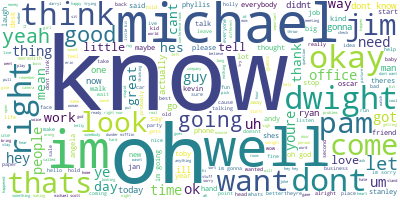

In [16]:
# Import the wordcloud library
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Join the different processed titles together.
long_string = ','.join(list(the_office['text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [17]:
#tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

the_office['text_tokenized'] = the_office['text_processed'].apply(lambda x: tokenization(x.lower()))
the_office

<ipython-input-17-fed6a494fa84>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_office['text_tokenized'] = the_office['text_processed'].apply(lambda x: tokenization(x.lower()))


Character  \
0       Michael   
1           Jim   
2       Michael   
3           Jim   
4       Michael   
...         ...   
44594       Jim   
44596       Jim   
44598       Jim   
44606    Dwight   
44608       Pam   

                                                                                                      Line  \
0                           All right Jim. Your quarterlies look very good. How are things at the library?   
1                                                                 Oh, I told you. I couldn’t close it. So…   
2                      So you’ve come to the master for guidance? Is this what you’re saying, grasshopper?   
3                                                               Actually, you called me in here, but yeah.   
4                                                        All right. Well, let me show you how it’s done.     
...                                                                                                    ...   
44594                                                                       What? No, no, it’s not a vote.   
44596                                             I don’t know. This conversation really got away from me.   
44598    No, they can’t. That’s not how this is gonna work. [exhales] We’re going in this room, we’re g...   
44606    I will run this branch, or I will destroy this branch, or… [shrugs] I don’t know. Something al...   
44608                                                  [in high-pitched, damsel-like voice] Is that right?   

       Season  Episode_Number  \
0           1               1   
1           1               1   
2           1               1   
3           1               1   
4           1               1   
...       ...             ...   
44594       7              24   
44596       7              24   
44598       7              24   
44606       7              24   
44608       7              24   

                                                                                         text_gens_nonstop  \
0                                           All right Jim. Your quarterlies look good. How things library?   
1                                                                 Oh, I told you. I couldn’t close it. So…   
2                                           So you’ve come master guidance? Is you’re saying, grasshopper?   
3                                                                             Actually, called here, yeah.   
4                                                                          All right. Well, let it’s done.   
...                                                                                                    ...   
44594                                                                             What? No, no, it’s vote.   
44596                                                         I don’t know. This conversation got away me.   
44598  No, can’t. That’s gonna work. [exhales] We’re going room, we’re going meeting. We’re gonna recom...   
44606             I run branch, I destroy branch, or… [shrugs] I don’t know. Something works out. [leaves]   
44608                                                       [in high-pitched, damsel-like voice] Is right?   

                                                                                            text_processed  \
0                                              all right jim your quarterlies look good how things library   
1                                                                     oh i told you i couldnt close it so…   
2                                                so youve come master guidance is youre saying grasshopper   
3                                                                                actually called here yeah   
4                                                                              all right well let its done   
...                                                                           

In [18]:
#remove special characters
the_office['text_tokenized'] = the_office['text_tokenized'].apply(' '.join).str.replace('[^A-Za-z\s]+', '') \
           .str.split(expand=False)
the_office

<ipython-input-18-094657e40065>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  the_office['text_tokenized'] = the_office['text_tokenized'].apply(' '.join).str.replace('[^A-Za-z\s]+', '') \
<ipython-input-18-094657e40065>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_office['text_tokenized'] = the_office['text_tokenized'].apply(' '.join).str.replace('[^A-Za-z\s]+', '') \


Character  \
0       Michael   
1           Jim   
2       Michael   
3           Jim   
4       Michael   
...         ...   
44594       Jim   
44596       Jim   
44598       Jim   
44606    Dwight   
44608       Pam   

                                                                                                      Line  \
0                           All right Jim. Your quarterlies look very good. How are things at the library?   
1                                                                 Oh, I told you. I couldn’t close it. So…   
2                      So you’ve come to the master for guidance? Is this what you’re saying, grasshopper?   
3                                                               Actually, you called me in here, but yeah.   
4                                                        All right. Well, let me show you how it’s done.     
...                                                                                                    ...   
44594                                                                       What? No, no, it’s not a vote.   
44596                                             I don’t know. This conversation really got away from me.   
44598    No, they can’t. That’s not how this is gonna work. [exhales] We’re going in this room, we’re g...   
44606    I will run this branch, or I will destroy this branch, or… [shrugs] I don’t know. Something al...   
44608                                                  [in high-pitched, damsel-like voice] Is that right?   

       Season  Episode_Number  \
0           1               1   
1           1               1   
2           1               1   
3           1               1   
4           1               1   
...       ...             ...   
44594       7              24   
44596       7              24   
44598       7              24   
44606       7              24   
44608       7              24   

                                                                                         text_gens_nonstop  \
0                                           All right Jim. Your quarterlies look good. How things library?   
1                                                                 Oh, I told you. I couldn’t close it. So…   
2                                           So you’ve come master guidance? Is you’re saying, grasshopper?   
3                                                                             Actually, called here, yeah.   
4                                                                          All right. Well, let it’s done.   
...                                                                                                    ...   
44594                                                                             What? No, no, it’s vote.   
44596                                                         I don’t know. This conversation got away me.   
44598  No, can’t. That’s gonna work. [exhales] We’re going room, we’re going meeting. We’re gonna recom...   
44606             I run branch, I destroy branch, or… [shrugs] I don’t know. Something works out. [leaves]   
44608                                                       [in high-pitched, damsel-like voice] Is right?   

                                                                                            text_processed  \
0                                              all right jim your quarterlies look good how things library   
1                                                                     oh i told you i couldnt close it so…   
2                                                so youve come master guidance is youre saying grasshopper   
3                                                                                actually called here yeah   
4                                                                              all right well let its done   
...                                                                           

In [19]:
#remove nlk stopwords
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['get', "didnt", 'would', 'a', 'hey', 'hello', 'hi', "ive", "im", 'like', 'also','ok',
                 "don't", "I've", "I'm", "I'll", 'id', 'dont', 'wont', 'isnt', 'hadnt', 'okay', 
                 'lol', 'youre', 'youll', 'doesnt', 'ok', 'thing', 'havent', 'thats', 
                 'told', 'thing', 'good', 'day', 'bad', 'cant','ago', 'yeah', 'hasnt', 'havent', 'ill', 'go',
                'theyre', 'oh', 'wouldnt', 'put', 'uh', 'el', 'um', 'go', 'where', 'let', 'ugh', 'duh', 'wasnt', 'shouldnt',
                'hmm', 'arent', 'umm', 'itll', 'theyll', 'think', 'yes', 'come', 'till', 'mr', 'na', 'da', 'give', 'huh', 'couldnt',
                'youve', 'whats','gonna', 'got', 'right', 'werent', 'ah', 'alright', 'itd', 'knew', 'weve', 'dont', 'ooh', 'hes', 'shes', 'youd',
                'ohh', 'ahh', 'lot', 'la', 'ya', 'give'])
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
#remove nlk stopwords
def remove_nlk_stopwords(text):
    text = [word for word in text if word not in stopword]
    print(text)
    return text
    
the_office['text_nlk_nonstop'] = the_office['text_tokenized'].apply(lambda x: remove_nlk_stopwords(x))
the_office

['jim', 'quarterlies', 'look', 'things', 'library']
['close']
['master', 'guidance', 'saying', 'grasshopper']
['actually', 'called']
['well', 'done']
['phone', 'speak', 'office', 'manager', 'please', 'michael', 'scott', 'regional', 'manager', 'dunder', 'mifflin', 'paper', 'products', 'wanted', 'talk', 'manageramanger', 'quick', 'cut', 'scene', 'done', 'deal', 'thank', 'much', 'sir', 'gentleman', 'scholar', 'sorry', 'sorry', 'mistake', 'hangs', 'woman', 'talking', 'low', 'voice', 'probably', 'smoker', 'clears', 'throat', 'way', 'done']
['dunder', 'mifflin', 'years', 'regional', 'manager', 'want', 'see', 'entire', 'floor', 'kingdom', 'far', 'eye', 'see', 'receptionist', 'pam', 'pam', 'pampam', 'pam', 'beesly', 'pam', 'forever', 'pam']
['cute', 'seen', 'couple', 'years', 'growls']
['fax']
['pam', 'corporate', 'times', 'theres', 'special', 'filing', 'cabinet', 'things', 'corporate']
['called', 'wastepaper', 'basket', 'look', 'look', 'face']
['people', 'best', 'boss', 'god', 'worked', 'plac

['lake']
['mall']
['secret', 'weapon', 'guys', 'lets', 'bring', 'listen', 'going', 'friendly', 'game', 'team', 'dunder', 'mifflin', 'team', 'course', 'beat', 'us', 'fired', 'joke', 'lets']
['game', 'man']
['everybody', 'stretch', 'little', 'bit', 'stretch', 'full', 'stretch', 'ryan', 'wanna', 'stretch']
['ryan', 'darryl', 'roy']
['really', 'thought', 'roy']
['actually', 'roy', 'best', 'player', 'lonny', 'dwight', 'east', 'german', 'gal', 'guys']
['taking', 'shirt', 'well', 'skins']
['shirts']
[]
['pam', 'kind', 'foot', 'camps', 'jump', 'ball']
['stanley', 'gotta', 'kidding', 'roy', 'steals', 'ball', 'goes', 'lay', 'lonny', 'shoots', 'makes', 'whos', 'somebody']
['jim', 'saves', 'ball', 'going', 'bounds', 'passes', 'michael', 'three', 'shoots', 'misses', 'lets', 'zone', 'going', 'zone']
['defense', 'clap', 'clap', 'michael', 'joins', 'defense', 'clap', 'clap']
['whos', 'roy', 'jim', 'roy', 'basket']
['misses', 'half', 'court', 'shot', 'aw', 'wrong', 'today', 'usually', 'hit', 'dwight', 

['blue', 'blast', 'trunk', 'unopened', 'arctic', 'chill', 'want', 'passengers', 'cupholder', 'thank']
['jim', 'way']
['katy', 'nice', 'meet']
['best', 'known', 'sitting', 'lets', 'talk', 'purses']
['katy', 'know', 'try', 'sell', 'one', 'seriously', 'cause', 'learn']
['know', 'know']
['stop', 'whoa', 'drakkar', 'noir']
['perfect', 'smellalike', 'paying', 'label']
['theres', 'straw', 'michael', 'opens', 'bottle', 'wipes', 'straw', 'neck', 'throw']
['months', 'ryan']
['thank', 'choosing']
['kidding', 'big', 'plans', 'weekend']
['katy']
['guys', 'going']
['man', 'know', 'dinner', 'drinks', 'movie', 'matching', 'tattoos']
['say', 'help', 'roys', 'cousin', 'move']
['cause', 'roys', 'truck']
['cool', 'well', 'monday', 'though']
['head', 'back']
['order', 'ladies', 'man', 'imperative', 'people', 'know', 'ladies', 'man', 'kind', 'play', 'close', 'chest', 'know', 'say', 'women', 'attracted', 'power', 'people', 'symmetrical', 'face', 'laughs', 'know', 'know', 'maybe', 'know']
['sure', 'want', 'he

['todd', 'packer', 'total', 'bff', 'best', 'friends', 'forever', 'came', 'salesmen', 'one', 'time', 'met', 'set', 'twins', 'packer', 'brothers', 'know', 'led', 'another', 'brought', 'em', 'motel', 'packer', 'awesome']
['ohwhoaoh', 'grade', 'gossip', 'randall', 'cfo', 'resigned', 'nobody', 'knows']
['really', 'buckle', 'going', 'bumpy', 'one']
['well', 'fair', 'blondes', 'brunettes', 'know', 'theres', 'dumb', 'people']
['wow']
['wow', 'tell', 'bleep', 'button']
['thumbs', 'hates', 'todd', 'packer', 'points', 'self', 'guy']
['boy', 'ryan', 'ryan', 'makes', 'donald', 'duck', 'noise']
['man', 'todd', 'packer', 'anything']
['excited', 'meet', 'mom']
['mom', 'coming', 'visit', 'lives', 'hours', 'away', 'cell', 'phone', 'cool', 'cause', 'kind', 'adding', 'suspense', 'looking', 'door', 'hoping', 'shell', 'walk']
['decided', 'around', 'wants', 'meet', 'everybody']
['cause', 'questions']
['child', 'pam', 'traits', 'hint', 'future', 'career', 'receptionist']
['send', 'link', 'monkey', 'sex', 'vid

['test', 'move', 'exits']
['desks']
['single', 'file', 'lines']
['drill']
['arms', 'sides', 'arms', 'sides']
['please', 'quickly', 'paper', 'company', 'people', 'step', 'lively']
['place', 'tinder', 'box', 'ready', 'blow']
['test', 'leave']
['want', 'die']
['want', 'die']
['lets', 'lets']
['stanley', 'seen', 'burn', 'victim']
['safety', 'partners']
['smoke', 'smoke', 'smoke', 'gah', 'spots', 'kelly', 'kelly']
['cover', 'nose', 'mouth', 'breathe', 'nose']
['breathe', 'nose', 'remove', 'stockings', 'melt', 'flesh', 'stay', 'smoke', 'line', 'lets', 'clear', 'stat', 'stat', 'means']
['heard', 'women', 'children', 'first', 'employ', 'children', 'sweat', 'shop', 'thankfully', 'women', 'equal', 'workplace', 'law', 'first', 'lawsuit', 'hands']
['another', 'rule', 'business', 'able', 'adapt', 'different', 'situations']
['adapt', 'react', 'readapt', 'act', 'rule', 'number', 'two']
['guys', 'listen', 'need', 'head', 'count', 'need', 'count', 'michaels', 'number', 'one']
['rule', 'two']
['well', '

['catch', 'contact', 'information', 'start', 'cell']
['office', 'cell', 'phone', 'talking', 'fake', 'high', 'voice', 'ryan', 'michael', 'jackson', 'calling', 'wonderland']
['calling', 'ryan', 'hangs']
['reading', 'jims', 'palm', 'major', 'minor', 'lines', 'cross', 'ridge', 'sucks']
['making', 'along']
['following', 'website']
['well', 'cavities']
['nice', 'teeth']
['taps', 'glass', 'office', 'ryans', 'attention', 'pick']
['high', 'pitched', 'voice', 'mike', 'tyson']
['dwight', 'sempai', 'going', 'humans', 'robots', 'peacefully', 'coexist']
['impossible', 'way', 'programmed', 'mocking']
['look', 'going', 'offer', 'little', 'piece', 'advice', 'afraid', 'example']
['advice', 'advice', 'sounds']
[]
['toy']
['absolutely', 'toy', 'arigatou']
['arigatou', 'toy', 'message', 'entire', 'office', 'capable', 'physically', 'dominating']
['yingyang', 'michael', 'cursive', 'scott', 'caps', 'left', 'brain', 'brain', 'duality', 'man']
['could', 'practice', 'forms']
['women', 'children', 'provoked']
['m

['sure', 'theres', 'transcript', 'naval', 'ship', 'lighthouse']
['real', 'pam', 'dumps', 'michaels', 'screenplay', 'jims', 'desk']
['screenplay', 'starring']
['long', 'flips', 'pages', 'pam', 'work', 'oop', 'wait', 'stop', 'drawings']
['drawings', 'case', 'writing', 'picture', 'head', 'flesh', 'agent', 'michael', 'scarn', 'know', 'looks']
['first', 'guy', 'says', 'well', 'astronaut', 'drive', 'saturn', 'second', 'guy', 'says', 'well', 'pimp', 'drive', 'cheap', 'escort', 'guy', 'says', 'gotcha', 'beat', 'proctologist', 'drive', 'brown', 'probe']
['copy', 'threat', 'level', 'midnight', 'michael', 'scott']
['lets', 'started', 'reading', 'action', 'descriptions', 'phyllis', 'play', 'catherine', 'zeta', 'jones']
['guys']
['dwight', 'movie', 'mean', 'america', 'enjoy']
['took', 'belong']
['want', 'play']
['lead', 'role', 'agent', 'michael', 'scarn']
['making', 'mouth', 'tie', 'talk', 'yum', 'yum', 'yum', 'yum', 'christian', 'laughs', 'delicious', 'love']
['bop', 'blah', 'bop', 'boo', 'boo', 

['today', 'thursday', 'dwight', 'thinks', 'friday', 'working', 'afternoon']
['god', 'stanley', 'frickin', 'brilliant', 'know', 'learn', 'streets', 'sorry']
['michael', 'jan', 'definitely']
['eck', 'thursday', 'dwight', 'thinks', 'friday', 'goin']
['work', 'stanley', 'great', 'performance', 'review', 'stanley', 'house', 'everybody', 'woo', 'angela', 'turn']
['actually', 'look', 'forward', 'performance', 'reviews', 'youth', 'beauty', 'pageant', 'circuit', 'enjoyed', 'bit', 'enjoy', 'judged', 'believe', 'hold', 'severe', 'scrutiny']
['jans', 'phone']
['angela', 'totally', 'satisfactory', 'year']
['interesting', 'jan', 'calling', 'maybe', 'mutual', 'puts', 'jan', 'speakerphone']
['jan', 'owe', 'pleasure']
['well', 'wanted', 'closure', 'transpired', 'meeting', 'parking', 'chilis']
['well', 'surely', 'review', 'formality', 'happened', 'meeting', 'parking', 'chilis']
['unprofessional']
['jan', 'hangs', 'girlfriend']
['talk', 'office', 'romances', 'nobodys', 'business', 'people', 'involved']
[

['dwight', 'going', 'happen', 'best', 'shape', 'life', 'look', 'flexes', 'arms', 'brrr', 'strong']
['matter', 'brain', 'aneurysm']
['going', 'brain']
['hit', 'car']
['bus', 'train', 'poisoned', 'fall', 'well', 'step', 'mine', 'choke']
['step', 'scranton', 'pennsylvania', 'die', 'job', 'away']
['certain', 'things', 'boss', 'share', 'employees', 'salary', 'depress', 'bed', 'going', 'tell', 'reading', 'emails']
['search']
['try', 'profits', 'try', 'michael', 'scott', 'michael', 'boss', 'funny', 'sadiq', 'guy', 'types', 'result', 'pops', 'god', 'wow', 'chuckles', 'email', 'stanley', 'stanley', 'terribly', 'nice', 'guy', 'reads', 'email', 'sorry', 'write', 'sooner', 'game', 'tonight', 'boss', 'michael', 'ass', 'making', 'stay', 'late', 'well', 'stanleys', 'ass', 'harder', 'workers']
['everybody', 'oscars', 'gone', 'crazy', 'ghost', 'stories', 'us', 'robot', 'robot', 'voice', 'destroy', 'path']
['bommmm', 'bop', 'onk', 'onk', 'tin', 'man', 'voice', 'oil', 'oil']
['defeats', 'purpose']
['true

['cool', 'cool', 'cool', 'need', 'ride', 'meredith', 'drops', 'top', 'michael', 'takes', 'picture', 'lets', 'head', 'sounds', 'coat']
['remember', 'animated', 'special', 'taught', 'monster', 'star', 'top', 'dwight', 'dwights', 'monster', 'taught', 'star', 'tree', 'teeth', 'star', 'tree']
['want', 'help']
['phyllis', 'angela', 'meredith', 'helpers', 'guess', 'angelas', 'kind', 'angelas', 'little', 'phyllis', 'meredith', 'little', 'pam', 'sort', 'medium', 'helper']
['christmas', 'lights', 'tinsel', 'star']
['dwight', 'dwight', 'looks', 'spock', 'wears', 'ears', 'grief', 'looking', 'spock', 'hates', 'different', 'pair', 'ears', 'wears', 'spock', 'reason']
['question', 'pam', 'roy', 'coming', 'party']
['well', 'tell', 'allowed', 'register', 'list']
['look', 'kidding', 'pam', 'shakes', 'head', 'phyllis', 'stag', 'assume']
['everyone', 'remain', 'calm', 'receive', 'instructions']
['open', 'presents', 'dwight']
['separates', 'humans', 'jungle', 'beasts', 'fact', 'rules', 'humans', 'gifts', 'p

['jim', 'great', 'friends', 'hang', 'ton', 'work', 'fact', 'secret', 'knows', 'says', 'friendship', 'intend', 'keeping', 'secret', 'long', 'possibly']
['lips', 'sealed', 'singing', 'lips', 'sealed', 'bangles']
['singing', 'hear', 'talk', 'us']
['listen', 'temp', 'conducting', 'little', 'investigation', 'longer', 'going', 'able', 'head', 'spring', 'cleaning', 'handle']
['stuff', 'stuff', 'game', 'night']
['em', 'news', 'p', 'situation']
['know', 'mean']
['talking', 'code']
['listen', 'stanley', 'long', 'pick', 'soda']
['going', 'actually']
['well', 'cool', 'michael', 'walks', 'jim', 'still', 'deciding']
['michael', 'presses', 'button', 'stanley', 'peach', 'iced', 'tea', 'going', 'hate']
['oscar', 'doin', 'dwight', 'schrute', 'calling', 'listen', 'little', 'question', 'buddy', 'called', 'minutes', 'answered', 'wondering', 'explain', 'see', 'sounds', 'sick', 'work', 'pharmacy']
['different', 'ways', 'tell', 'perp', 'lying', 'liar', 'avoid', 'direct', 'eye', 'contact', 'liar', 'cover', 'fa

['well', 'though', 'gotta', 'suck', 'gotta', 'try', 'fun', 'poker', 'game', 'tonight']
['technically', 'fell', 'asleep', 'bed']
['sorry', 'fix', 'talk', 'talk', 'david']
['serious', 'shirley', 'airplane']
['women', 'wolves', 'want', 'wolf', 'trap', 'snare', 'tame', 'keep', 'happy', 'care', 'feed', 'lovingly', 'way', 'animal', 'deserves', 'loved', 'animal', 'deserves', 'loving']
['nothing', 'sit', 'phyllis', 'entire', 'garden', 'delivered']
['mean', 'know', 'said', 'big', 'gifts', 'kind', 'hoping']
['well', 'heres', 'deal', 'fault', 'totally', 'guys', 'came', 'talking', 'guys', 'chatting', 'joke', 'dumb', 'joke', 'craig', 'idiot', 'took', 'seriously', 'jan', 'looks', 'michael']
['stupid', 'craig', 'saw', 'sharpest', 'tool', 'shed', 'although', 'tool', 'david', 'grins']
['know', 'borderline', 'best', 'jan', 'fantastic', 'executive', 'integrity', 'world', 'sorry', 'happen']
['beesly', 'happy', 'valentines']
['big', 'deal', 'really', 'sorry']
['happy', 'valentines', 'jan', 'turns', 'kisses

['list', 'price', 'dollars', 'cents', 'unfortunately', 'item', 'watch', 'beeps', 'back', 'order', 'hangs', 'michael', 'michael', 'michael', 'michael', 'michael']
['listen', 'everyone', 'exactly', 'exact', 'moment', 'emerged', 'mothers', 'vaginal', 'canal', 'seat', 'please']
['tradition', 'hebrews', 'hoisting', 'birthday', 'boy', 'chair']
['help', 'celebrate', 'michaels', 'birth', 'moment', 'kevin']
['ryan', 'lets']
['feel', 'kevin', 'something', 'sneak']
['maybe', 'need', 'somebody', 'create', 'diversion']
['three', 'going', 'hoist', 'away', 'ready']
['one', 'two', 'three', 'michael', 'raised', 'head', 'hits', 'ceiling']
['whoa', 'whoa', 'watch', 'please']
['f', 'damage']
['pulls', 'wallet', 'thirty', 'nine', 'sixty']
['tip', 'job', 'capable', 'deliver', 'food', 'drive', 'taxi', 'cut', 'hair', 'however', 'tip', 'urologist', 'unable', 'pulverize', 'kidney', 'stones']
['birthday', 'party', 'subs', 'gift']
['bologna', 'tomato', 'ketchup']
['bologna', 'eat', 'bologna']
['well', 'tomato', '

['feel', 'terrible', 'calling', 'people', 'faggie', 'junior', 'high', 'mistake', 'know', 'behave', 'far', 'opposite', 'way', 'know', 'imagine', 'maybe', 'beer', 'sometime', 'tell', 'dude']
['reference', 'oscar', 'gay', 'explains', 'much']
['dunder', 'mifflin', 'paper', 'flammable', 'sir', 'assure', 'certainly', 'flammable']
['transfer', 'stamford', 'pretty', 'obvious', 'promoted', 'beat', 'view']
['ate', 'tuna', 'sandwich', 'andy', 'started', 'calling', 'big', 'tuna', 'actually', 'know', 'real', 'name']
[]
['tell', 'whos', 'gay', 'whos']
['well', 'dressed', 'womens', 'clothes']
['deep', 'sigh', 'others', 'need', 'know', 'want', 'offend', 'anybody', 'else']
['assume', 'offensive']
['sure', 'appreciate', 'treating', 'gay']
['angela', 'hard', 'severe', 'gay', 'woman']
[]
['know', 'imagine', 'woman']
['research', 'find', 'theres', 'way', 'tell', 'looking']
['jim', 'buy', 'gaydar', 'online']
['probably', 'tell', 'truth']
['sighs', 'lets', 'website']
['damn', 'thinks', 'try', 'brookstone']
[

['people', 'kelly', 'million', 'true', 'true', 'frankly', 'literally', 'billions', 'people', 'kelly', 'world', 'famous', 'indians', 'slide', 'show', 'subrahmanyan', 'chandrasekhar', 'nobel', 'prizewinning', 'physicist', 'impressive', 'apu', 'simpsons', 'hilarious', 'indian', 'night', 'shyamalan', 'village', 'unbreakable', 'sixth', 'sense', 'sig']
['dead', 'time']
['stop', 'slide', 'michael', 'carol', 'kissing', 'whoa', 'laughs']
['indian', 'people', 'love', 'sex', 'positions', 'present', 'kama', 'sutra', 'mean', 'look', 'whos', 'seen']
['incredibly', 'offensive']
['well', 'beautiful']
['well', 'kelly', 'wants', 'house', 'fine', 'subjected']
['going', 'collect']
['delightful', 'charming', 'culture']
['indian', 'culture', 'seminar', 'going', 'great', 'toby', 'decided', 'immature', 'deal', 'culturally', 'explicit', 'images', 'sex', 'people', 'everybody', 'carol', 'probably', 'tonight']
['quarter', 'sales', 'staff', 'branch', 'stay', 'late', 'order', 'form', 'consolidation', 'amazingly', '

['coughs', 'sentence', 'making', 'fun', 'comeback', 'worked', 'talks', 'normally', 'camera', 'totally', 'best', 'interchange']
['tell', 'martin', 'ne', 'ne', 'nack']
['mocha', 'complexion', 'supplier', 'relations', 'either', 'caught', 'fish', 'standing', 'man', 'caught', 'fish', 'key', 'west', 'florida']
['talking']
['holds', 'piece', 'paper', 'clear', 'google', 'image', 'search']
['kev']
['smart', 'angela', 'angela']
['need', 'hair', 'cut']
['bye', 'angela', 'kev']
['hairs', 'flipping', 'sides']
['weird', 'facing', 'way']
['office', 'existed', 'pam', 'chuckles', 'whos', 'guy', 'jim', 'points', 'stanley']
['salesmen']
['seems', 'nice', 'guy']
['points', 'meredith']
['janet', 'fenstermaker']
['pam', 'nods', 'head', 'use', 'name']
['thank', 'helpful', 'know', 'one', 'question', 'fine', 'older', 'gentleman', 'corner', 'points', 'creed']
['creed', 'bratton', 'toes', 'fought', 'civil', 'war']
['sides', 'whoever', 'paid']
['sorry', 'man', 'pam', 'hesitates', 'leaves']
['nicknames', 'yay', 'p

[]
['jim', 'carrey', 'walk']
['god', 'karen', 'animal', 'muppet', 'babies']
['see', 'stomach']
['bunch', 'messages', 'sees', 'michael', 'shaking', 'head', 'beads', 'hair', 'nice', 'hannah', 'quit', 'gone', 'guess', 'memoed', 'file', 'complaints', 'working', 'mother', 'deposed']
['blah', 'blah', 'blah', 'blah', 'blah', 'blah', 'blah', 'blah', 'relax']
['relax', 'later']
['going', 'ask', 'jamaica', 'say', 'ask']
['stanley', 'know']
['payroll', 'charge']
['well', 'getting', 'settled']
['fun', 'jamaican', 'brothers', 'mon']
['want', 'talk']
['feelin', 'hot', 'hot', 'hot', 'playing', 'conch', 'shell', 'feelin', 'hot', 'hot', 'hot', 'feelin', 'hot', 'hot', 'hot', 'feelin', 'hot', 'hot', 'hot', 'know', 'far', 'practicing']
['michael', 'continues', 'play', 'conch', 'shell']
['know', 'country']
['jamaicans', 'live', 'great', 'know', 'relax', 'party', 'time']
['kind', 'impoverished', 'country']
['gosh', 'great', 'know', 'pam', 'make', 'note', 'want', 'start', 'pina', 'coladas', 'three']
['today'

['works', 'hold', 'hold', 'hold', 'look', 'look', 'phyllis', 'dad', 'upstaged', 'ceremony', 'owe', 'kay']
['going']
['hate']
['going', 'famous', 'beesly', 'dance', 'moves']
['people', 'want']
['dorky', 'dancer']
['know', 'cute']
['hypothetically', 'thought', 'pam', 'interested', 'totally', 'hypothetical']
['michael']
['bob', 'phyllis', 'orders']
['look', 'wanted', 'quietly', 'sit', 'piece', 'cake', 'going', 'dance', 'song']
['real', 'life', 'wedding', 'crasher', 'bounce', 'sorry', 'gives', 'pleasure']
['weird', 'thought', 'played', 'police']
['sings', 'ee', 'meant', 'buppity', 'du', 'bom', 'bu']
['heres', 'hypothetical', 'happy', 'karen']
['want', 'phyllis', 'great']
['great', 'together', 'great', 'team']
['robert', 'parrish', 'talk', 'want', 'ruin', 'honeymoon']
['dude', 'together', 'listened', 'half', 'hour', 'stuff', 'went', 'head']
['phyllis', 'phyllis', 'wait', 'please', 'sorry', 'wanted', 'remember']
['kind', 'weirdo']
['wedding', 'goes', 'flash', 'lucky', 'piece', 'cake', 'crazy

['going', 'kill', 'pretending', 'kill']
['michael', 'jump', 'bouncy', 'castle', 'going', 'horribly', 'horribly', 'injured']
['michael', 'present']
['open', 'see']
['dwight', 'present']
['anything', 'bluffing']
['repliee', 'q', 'expo', 'female', 'robot', 'available', 'japan']
['dwight', 'liar', 'pam', 'really']
['lead', 'cushy', 'wimpy', 'nerf', 'life']
['live']
['complicated', 'jan', 'know', 'stand', 'want', 'sex', 'nearly']
['mean']
['pam', 'coming', 'present']
['office', 'safe', 'people', 'people', 'drive', 'crazy', 'things', 'dangers', 'office', 'danger', 'today', 'saved', 'life', 'hero', 'say']
['walks', 'andys', 'new', 'car', 'keying']
['everybody', 'time', 'pam', 'lets']
['thought', 'stay', 'answer', 'phones']
['worry', 'pam', 'answering', 'phones', 'rest', 'life', 'long', 'lovely', 'life', 'whispers', 'camera', 'saved']
['step', 'lively', 'single', 'file', 'everybody']
['going', 'science', 'museum']
['tactile', 'learner']
['buddy', 'system', 'buddy', 'buddy']
['kelly', 'ryan', '

['hazards', 'safety', 'lets', 'see', 'takes', 'coat', 'tosses', 'aside', 'pam', 'brings', 'jack', 'lug', 'wrench', 'tries', 'use', 'jack', 'loosen', 'lug', 'nuts']
[]
['crescent', 'crescent', 'allan']
['need', 'michael']
['know', 'going', 'care', 'traffic', 'detail']
['know', 'changed', 'tire', 'today', 'bathrobes', 'coming', 'handy', 'meredith', 'honking', 'coming']
['cause', 'justice', 'rests']
['wholesies', 'snatches', 'candy', 'bar']
['natch', 'bites', 'candy', 'bar']
['know', 'underestimated', 'total', 'ass', 'coughs']
['going']
['know', 'need', 'girls', 'pam', 'karen', 'phyllis', 'lets', 'lets', 'sighs']
['love', 'guys', 'getting', 'voicemail']
['leaving', 'message', 'jan', 'michael', 'calling', 'need', 'little', 'break', 'permanently', 'know', 'everybody', 'says', 'ii', 'wanna', 'remain', 'friends', 'business', 'associates', 'along', 'know', 'jan', 'walks', 'buddy', 'somebody', 'walked', 'talk', 'later']
['maybe', 'italian', 'voice', 'phone', 'remain', 'friends', 'business', 'as

['well', 'taking', 'responsibility', 'rid', 'curse', 'hit', 'meredith', 'car', 'superstitious', 'littlestitious']
['involving', 'indian', 'burial', 'ground']
['park', 'dig', 'body', 'toby', 'anything', 'want', 'tell', 'us']
['perfect', 'tragedy', 'luck', 'satan']
['sprinkles', 'hurt', 'soul', 'god', 'infinite', 'wisdom', 'ready', 'left', 'accomplish']
['never']
['cats', 'provide', 'milk', 'wool', 'meat']
['dwight', 'seen', 'meredith', 'yet']
['well', 'hospital', 'pay', 'respects']
['respect']
['talk', 'individual', 'religious', 'beliefs']
['satan', 'master', 'lies', 'everything', 'says', 'opposite']
['thank', 'permission', 'psych', 'lets', 'room', 'tell', 'believe']
['puts', 'hand', 'high', 'five', 'religion']
['kelly', 'hindu', 'believe', 'buddha']
['farmer', 'know', 'animal', 'sick', 'misery', 'electricity', 'meredith', 'alive', 'power', 'small', 'fan', 'days', 'tell', 'unethical']
['blink', 'want', 'pull', 'plug']
['doctor', 'male', 'nurse']
['pfft', 'chart', 'indicate', 'hysterecto

['sorry', 'pay', 'show']
['ahead']
['watching', 'mose', 'spins']
['arr', 'dammit', 'throws', 'saw', 'table', 'working']
['dancing', 'babies', 'love', 'love']
['making', 'commercial', 'dunder', 'mifflin', 'today', 'ad', 'ever', 'corporate', 'purchased', 'air', 'time', 'local', 'markets', 'spread', 'word', 'dunder', 'mifflin', 'infinity', 'sending', 'professional', 'ad', 'company', 'help', 'later', 'shabby']
['close']
['break', 'piece', 'applesauce']
['football', 'cream', 'football', 'cream', 'anybody', 'else']
['taking', 'animation', 'class', 'try', 'logo']
['look', 'even', 'receptionist', 'getting', 'creativity']
['know', 'want', 'cutting', 'edge', 'want', 'fast', 'quick', 'cuts', 'know', 'youthful', 'sort', 'mtv', 'crack', 'kind']
['work']
['meet', 'andrew', 'bernard', 'nard', 'dog', 'nard', 'dog']
['gives', 'best', 'rubs', 'office']
['gentleman', 'key', 'urban', 'vibe']
['stanley', 'hilarious', 'phyllis', 'mrs', 'butterworth', 'kind', 'urban', 'aunt', 'jemima']
['accountants', 'diffe

['wrote', 'michael', 'settle', 'pledge', 'bring', 'god', 'witness', 'shall', 'bear', 'fruit']
['sounds', 'smile', 'wawait', 'wait', 'wait', 'wait', 'first', 'wendys', 'food']
['phone', 'fantastic', 'thank', 'thank', 'much', 'needed']
['furniture', 'company', 'gave', 'advertising', 'agency', 'gave', 'photographer', 'photographer', 'spaniard', 'wilkesbarre', 'modeling', 'agency', 'agency', 'gave', 'following', 'information', 'reads', 'notepad', 'deborah', 'shoshlefski', 'south', 'windsor', 'lane', 'dead', 'car', 'accident', 'case', 'closed']
['dead', 'dwight', 'makes', 'knife', 'slitting', 'noise', 'young']
['young', 'dead', 'dead', 'dead', 'animal', 'died']
['sit', 'michael', 'gets', 'leads', 'michael', 'sit', 'chair']
['michael', 'know']
['try', 'hurtful', 'jim']
['jim', 'dare', 'jims', 'face', 'shock']
['please', 'time', 'sighs']
['michael', 'know']
['really', 'name', 'burger', 'king']
['mean', 'walks', 'michael', 'nice', 'sweet', 'guys', 'actually', 'along', 'hands', 'card', 'michael

['microphone', 'lets', 'hear', 'darryl', 'band', 'applause', 'know', 'lets', 'shoutout', 'phyllis', 'awesome', 'party']
['probably', 'best', 'cheers', 'applause', 'real', 'reason', 'goodbye', 'guy', 'probably', 'know', 'accomplished', 'songwriter']
['things', 'beers', 'heaven']
['total', 'eclipse', 'fart']
['love', 'sing', 'going', 'today', 'going', 'wrote', 'specifically', 'toby', 'band', 'know', 'goodbye', 'stranger', 'supertramp']
['sings', 'early', 'morning', 'yesterday', 'dawn', 'enjoyed', 'stay', 'toby', 'movin']
['miss', 'toby', 'nice', 'calming', 'presence', 'office']
['singing', 'goodbye', 'toby', 'nice', 'hope', 'paradise']
['tell', 'said', 'thought', 'kinda', 'cute']
['singing', 'screaming', 'mic', 'tomorrow', 'feel', 'pain', 'feel', 'pain', 'toby', 'toby', 'tobeeyy', 'tobys', 'goin', 'away', 'see', 'outta', 'see', 'outta', 'goodbye', 'toby', 'goodbye', 'toby', 'goodbye', 'toby', 'goodbye', 'toooby']
['well', 'actutoo', 'soon', 'sexual', 'cell', 'phone', 'rings', 'sorry', 'k

['someday', 'well', 'comstock', 'hall', 'laugh']
['tom', 'nice']
['asked', 'tom', 'pete', 'early', 'play', 'prank', 'jim', 'lunch', 'pretty', 'awesome', 'idea', 'probably', 'thinking', 'pam', 'beasly', 'coolest', 'sisterinlaw', 'planet', 'best', 'absolute', 'best']
['heres', 'thinking', 'ceramics', 'class', 'took', 'ring', 'changed', 'smock', 'pocket', 'anymore', 'lost']
['ring', 'ring']
['came', 'idea', 'fast']
['ahhhh', 'waking', 'whew', 'ow', 'nightmare']
['really', 'saying', 'interesting']
['scoop', 'far']
['halfway', 'know', 'want', 'want', 'pull', 'little', 'bed', 'breakfast', 'meet', 'middle', 'emphasis', 'bed', 'breakfast']
['sit', 'comfortable']
['know', 'imagined', 'hotel', 'pool', 'really', 'breakfast', 'place', 'bacon']
['fourth', 'times', 'charm', 'lifes', 'road', 'back', 'sometimes', 'deal', 'today', 'want', 'theres', 'world', 'holly', 'sobs', 'crying']
['work', 'fine']
['listen', 'much']
['dated', 'women', 'last']
['years']
['dated', 'women', 'far', 'stupid']
['holly', '

['wait', 'minute', 'theres', 'drugs']
['gahh', 'dammit', 'punches', 'file', 'cabinet']
['wait', 'officers', 'sure', 'want', 'interrogate']
['following', 'laws', 'protect', 'kind', 'interrogation', 'use']
['feel', 'pretty']
['since', 'illegal', 'caprese', 'salad', 'anywhere']
['kidding', 'kidding', 'worried', 'worried', 'cops', 'time', 'framed', 'worried', 'taxpayer', 'dah', 'god', 'welcome', 'back', 'jerky', 'jerkface']
['said', 'leaving', 'liars', 'us']
['came', 'back', 'makes', 'biggest', 'liar', 'history']
['want', 'hear', 'lie']
['great', 'best', 'friend']
['walking', 'building', 'mind', 'stop', 'way', 'home']
['getting', 'car', 'parents', 'house']
['surprise', 'ready', 'close', 'eyes', 'spins', 'open', 'eyes', 'tadah']
['bought', 'lets', 'inside', 'inside', 'walking', 'inside', 'believe', 'realtor', 'saving', 'closing', 'costs', 'money', 'deshag', 'carpet', 'help', 'color', 'situation', 'pam', 'walks', 'clown', 'painting', 'wall', 'sorry', 'tried', 'nailed', 'worried', 'art', 'the

['pretty', 'funny', 'know', 'drop']
['heck', 'bends', 'cuts', 'phone', 'cords', 'scissors']
['look', 'else']
['fries', 'please', 'drive', 'around']
['knocks', 'pams', 'hotel', 'door', 'morning']
['ready', 'herd', 'turtles']
['well', 'pam', 'eloped', 'actually', 'robbed', 'bank', 'lam', 'laughs', 'seriously', 'lecture', 'circuit', 'apparently', 'scranton', 'best', 'sales', 'regional', 'branch', 'david', 'wallace', 'asked', 'branches', 'nashua', 'little', 'bit', 'raw', 'going', 'branches', 'sharing', 'secret', 'recipe', 'success', 'business', 'herbs', 'spices', 'sales', 'batter', 'looks', 'pam', 'well', 'pam', 'pam', 'coming', 'assistant', 'driver', 'focus', 'pack', 'heavy']
['toboggan', 'know', 'snowy', 'hill', 'every', 'magician', 'hot', 'assistant', 'rock', 'star', 'roadie', 'pam', 'hot', 'roadie']
['love', 'road', 'especially', 'love', 'time', 'half', 'pay', 'hours', 'days', 'cause', 'mortgage', 'bring', 'home', 'bucks']
['bucks', 'lady', 'gets', 'backseat', 'drive', 'stay', 'hotels'

['said', 'david', 'laughs']
['dwight', 'great', 'idea', 'dwight', 'dwight', 'great', 'idea', 'howd', 'idea']
['really', 'inspired', 'pop', 'head', 'dwight']
['time', 'michael', 'know', 'strike', 'boom']
['details', 'happened']
['taking', 'dwight', 'schrute', 'biggest', 'wonka', 'fan', 'know', 'mean', 'talking', 'movie', 'years']
['know', 'fun', 'dressed', 'willy', 'wonka', 'pitch', 'idea', 'apologize']
['going', 'dwight', 'hug', 'thanks', 'helping', 'company', 'dwight']
['time', 'michael', 'cause', 'idea']
['could', 'meeting']
['lets', 'face', 'meeting', 'sounds', 'wonka', 'fans', 'seen', 'movie', 'david', 'laughs']
['guys', 'listen', 'heres', 'deal', 'love', 'candy', 'sweet', 'sugary', 'candy', 'second', 'touches', 'tongue', 'moment', 'metabolized', 'stomach', 'acids', 'naturally', 'liked', 'willy', 'wonka']
['love', 'willy', 'wonka', 'golden', 'ticket', 'scene', 'inspiring', 'cam', 'idea', 'michael', 'comes', 'conference', 'room']
['movie', 'called', 'willy', 'wonka', 'called', 'will

['situation']
['old', 'boss', 'dwight', 'first', 'dibs', 'respect', 'dibs']
['meet', 'minutes', 'spot']
['cool', 'new', 'guy', 'charles']
['andy', 'know', 'thinkin', 'said']
['know']
['pam', 'gets', 'know', 'rely', 'pretty', 'emotionally', 'needy']
['laugh', 'know', 'doin']
['dwight', 'shirt']
['god', 'run', 'run', 'setup', 'setup']
['michael', 'upset', 'shirt', 'sleeves', 'first']
['michael', 'storms', 'office', 'wow']
['setup', 'dwight', 'charles']
['tell', 'talking']
['girl', 'says', 'shell', 'boyfriend', 'waiting', 'corner', 'peefilled', 'balloon']
['help', 'tell', 'happened']
['hit', 'face', 'peefilled', 'water', 'balloon', 'pam', 'know', 'filled', 'balloon', 'pee', 'funnel', 'know', 'clear']
['jim', 'slams', 'lunchbag', 'table', 'totally', 'blew', 'sales', 'call']
['well', 'different', 'cause', 'suck', 'suck']
['look', 'mirror', 'face', 'looks', 'back']
['said', 'forget', 'drop', 'kicks', 'lunch', 'room', 'stomps']
['wrong', 'number', 'michael']
['want', 'listen', 'friend', 'want

['want', 'sick', 'hospital']
['dwight', 'want', 'worry']
['know', 'nohting', 'hanging', 'cafe', 'disco', 'flare', 'existing', 'injury', 'tough', 'old', 'bird']
['work', 'instead', 'masterminding', 'situations', 'hurt']
['phyllis', 'injure', 'injured', 'fun', 'trade', 'memory', 'anything', 'phyllis', 'heard', 'screaming', 'backgroud']
['took', 'life', 'today', 'life', 'party', 'erin']
['want', 'downstairs', 'want', 'shut']
['care', 'bury', 'hope', 'happy']
['exits', 'conference', 'room', 'undershirt', 'need', 'able', 'bodied', 'men']
['guess', 'want', 'eating', 'alone', 'might', 'dinner']
['comfy', 'relax', 'relax']
['relax', 'shirt', 'favors', 'assessment', 'correct', 'grind', 'teeth']
['kidding', 'sits', 'feet', 'annoying', 'mimics', 'grinding', 'teeth', 'children', 'singing', 'christmas', 'carols']
['cafe', 'disco', 'dead', 'hear', 'music', 'head']
['better', 'imagined']
['tell', 'hurts']
['knot', 'crest', 'remedy', 'passed', 'family', 'generations', 'works', 'grandfather', 'diamond'

['wanna']
['tried', 'michael', 'dark', 'known', 'damage', 'dark']
['need', 'pupils', 'need', 'dilated']
['thought']
['serious', 'cause', 'look', 'exactly', 'alike', 'one', 'getting']
['david', 'michael', 'scott', 'jim', 'pushes', 'speaker', 'phone', 'button', 'michael', 'scott']
['wanted', 'talk', 'jim', 'halpert', 'understand', 'receive', 'promotion', 'wanted', 'nudge', 'direction']
['wha', 'heres', 'jim', 'best', 'man', 'job']
['well', 'nnnn', 'anomaly', 'file', 'falsified', 'toby', 'flenderson', 'drugs']
['wait', 'lift', 'personal', 'elevator']
['broke', 'ankle', 'climbing', 'railing', 'lied', 'misuse', 'company', 'equipment', 'case', 'closed']
['really', 'new', 'wood', 'railing', 'hmmm', 'check', 'security', 'tapes', 'toby']
['file', 'official', 'complaint', 'corporate', 'darryl', 'lied', 'official', 'form']
['phhhht', 'judge', 'believe']
['jim', 'feel', 'punch', 'face']
['times', 'asked', 'branch', 'manager', 'job']
['recommended', 'want', 'lose', 'want', 'lose', 'pam', 'starts', 

['mock', 'oscar', 'mock', 'want']
['fish', 'cent', 'worm']
['great', 'meeting', 'everybody']
['thank', 'everyone', 'begins', 'leave']
[]
['sometimes', 'excited', 'forget', 'business', 'meeting']
['gotta', 'ride', 'man']
['jim', 'understand', 'things', 'die', 'kids', 'high', 'school', 'ponytail']
['jim', 'time', 'ponytail', 'stuck', 'power', 'trail']
['maybe', 'fun', 'away']
['want', 'fun']
['really', 'big', 'stupid', 'goofball']
['stupid']
['wanna', 'believe', 'walked', 'koi', 'pond', 'mean', 'seriously', 'walk', 'much', 'everyone', 'starts', 'laughing', 'wear', 'snorkel', 'business', 'meeting']
['well', 'know', 'phyllis', 'seen', 'pond', 'world', 'class', 'moron', 'problem']
['michael', 'please', 'stop', 'embarrassing']
['fun', 'actually', 'time', 'embarrassed', 'pond', 'high', 'school', 'girls', 'volleyball', 'team', 'hrow', 'frozen', 'lake', 'four', 'years', 'row', 'freezing', 'jim', 'signals', 'making', 'stop', 'worse', 'michael', 'begins', 'lose', 'cool', 'couple', 'weeks', 'went'

['sorry', 'phyllis', 'hates', 'hates', 'body', 'santa', 'remembers', 'reindeer', 'tiny', 'bit', 'different', 'well']
['big', 'boy', 'kevin', 'sits', 'lap', 'struggle', 'god']
['christmas', 'little', 'boy']
['going', 'happen']
['toys', 'please']
['damn', 'kevin']
['pushes', 'kevin', 'god']
['know', 'thousand', 'helium', 'balloons', 'attached', 'santa']
['trying', 'phyllis', 'santa']
['ahhh', 'ho', 'ho', 'ho', 'struggles', 'pull', 'ryan', 'need']
['everything']
['yup', 'ryan', 'fun']
['talk', 'second']
['yell', 'need', 'need', 'pin', 'employee', 'lap']
['know', 'jim', 'santas', 'room', 'things', 'ruthless']
['understand', 'forced', 'hand']
['michael', 'phyllis', 'want', 'phyllis', 'santa']
['want', 'vote']
['everybody', 'office', 'pulled', 'apart', 'realize', 'traditions', 'stake']
['wants', 'phyllis', 'santa', 'raises', 'hand']
['wait', 'choices', 'information', 'dwight', 'counts', 'raised', 'hands', 'kidding', 'kevin', 'killed']
['want', 'michael', 'santa', 'raise', 'hand', 'michael', 

['well', 'expect', 'expect', 'going', 'voids', 'life', 'love', 'going', 'hole', 'body', 'person', 'cupid', 'going', 'shoot', 'love']
['remember', 'yesterday', 'terrified', 'parents']
['kids', 'know']
['well']
['baby', 'yawns', 'big', 'yawn']
['one', 'wrap', 'around', 'hold', 'arm']
['strong', 'careful', 'though', 'want', 'break']
['know', 'tell', 'getting', 'anything']
['well', 'pushing', 'milk']
[]
['kinda']
['want', 'try', 'jim']
['job']
['really', 'must', 'sat', 'pam']
['tell', 'getting', 'anything', 'feel']
['even', 'getting', 'anything']
['read', 'book', 'nipple', 'confusion']
['tentative', 'latching', 'want', 'selfesteem']
['going']
['maybe', 'socialize', 'babies']
['ha', 'ha']
['say', 'change', 'life']
['meet', 'new', 'boyfriend']
['hold', 'whoa', 'whoa', 'whoa', 'cookies', 'cool', 'pop', 'em', 'mouth', 'guys', 'know', 'maybe', 'lunch', 'together']
['going', 'kill', 'kevin']
['sure', 'kevin', 'enormous', 'heart', 'literally', 'elephant', 'heart', 'transplant', 'seventeen', 'prob

['kelly', 'applicant']
['dear', 'god', 'decisions', 'yet', 'back']
['contract', 'thursday']
['nice', 'business']
['know']
['whispers', 'donna']
['follows', 'office', 'ahem', 'theres', 'questions']
['bye']
['elevator', 'ride']
[]
['feel', 'fast', 'track', 'executive', 'position', 'company']
['talking', 'paleface']
['offering', 'ticket', 'bullet', 'train', 'straight', 'middle', 'management']
['speaking', 'rainbows', 'oscar', 'kind', 'double', 'minority', 'gay', 'sabre', 'benefit', 'perspective']
['protect', 'kelly', 'erin', 'stifles', 'laugh', 'seriously', 'erin', 'turns', 'leaves', 'kitchen']
['whoa', 'whoa', 'whoa', 'whoa', 'whoa', 'hide', 'toshi', 'hasagawa', 'apply', 'sabre', 'minority', 'executive', 'training', 'program', 'print', 'colors', 'initiative']
['helping', 'heal', 'america', 'dramatic', 'fashion', 'th', 'hour']
['caucasians', 'hide', 'seat', 'translate']
['know', 'need']
['michael', 'michael', 'sitting', 'couch', 'outside', 'office']
['know', 'know', 'trust', 'feelings', '

['language', 'skills', 'cognitive', 'development', 'area', 'english', 'letters', 'pause', 'magical', 'toy', 'box', 'jim']
['actually', 'forks', 'knives', 'break', 'room']
['jim', 'maybe', 'childs', 'imagination', 'fork', 'lieutenant', 'knife', 'ms', 'fork']
['soy', 'sauce', 'packet']
['embarrassed']
['fully', 'equipped', 'restroom', 'feeding', 'trough', 'play', 'bucket', 'room', 'plant', 'success']
['watching', 'children']
['one', 'door', 'locks', 'outside', 'escape', 'impossible']
['going', 'head', 'outside', 'whirl', 'want', 'works']
['tell', 'works', 'looking', 'real']
['promise', 'door', 'locks', 'jim', 'closes', 'door']
['worst', 'worst', 'hate', 'looking', 'face', 'wanna', 'smash']
['know', 'mistake', 'committed', 'corporate', 'punishment', 'done', 'punishment', 'worse', 'hell']
['know', 'want', 'ask', 'mom', 'naked']
['molest', 'going', 'leave', 'blinds', 'open', 'big', 'failure', 'key']
['boycott', 'steamtown', 'mall', 'everyone', 'heard', 'cancel', 'business', 'steamtown', 'ma

['want', 'feeling', 'base', 'around', 'glee', 'thirst', 'watch']
['tonight', 'convenient', 'night', 'intercourse']
[]
['gabe', 'gabe', 'boss']
['boss']
['yeeee', 'guys', 'consider', 'gabe', 'boss']
['gabe', 'likes', 'entertain', 'ad', 'cooks', 'oven', 'jazz', 'different', 'life', 'style', 'bags', 'vegetables', 'steam', 'inside', 'bag', 'ingredients', 'sit', 'tv', 'bag', 'vegetables', 'know', 'ready', 'bed']
['tossing', 'pizza', 'dough', 'air']
['try', 'destroy', 'old', 'ways', 'gabe', 'throws', 'pizza', 'dough', 'hits', 'ceiling']
['play', 'referring', 'keyboard']
[]
['cece', 'reverse', 'cycling', 'means', 'sleeps', 'night', 'basically', 'means', 'night', 'stop', 'soon', 'going', 'night']
['wheres', 'michael', 'wheres', 'michael', 'start', 'michael', 'ohhhh', 'yayyy', 'begin', 'turning', 'volume']
['actually', 'loud', 'enough', 'may', 'thank', 'sah', 'takes', 'remote', 'raises', 'volume', 'glee', 'rock', 'roll', 'turn', 'elevaan', 'spinal', 'cord']
['well', 'trying']
['grabs', 'differe

['man', 'tell', 'confidently']
['tell', 'aj', 'commit', 'holly', 'tell', 'propose', 'end', 'year']
['really', 'know', 'know', 'happy', 'marriages', 'start', 'ultimatum']
['mean', 'wait', 'want', 'fall']
['accept', 'surrender', 'theres', 'way', 'relent']
['hit', 'pam', 'face', 'snowball', 'watch']
[]
['mall', 'saw', 'thought', 'written']
['went', 'mall', 'picked', 'especially']
['hands', 'kelly', 'receipt', 'wallet', 'mall']
['thank', 'hostess', 'apple', 'pie', 'favorite', 'breakfast', 'know', 'thank', 'much']
['know', 'remember', 'santa', 'promised', 'listen', 'gifts', 'wanted', 'christmas']
['know']
['sure', 'want', 'pony', 'want', 'real', 'horse']
['pick']
['want']
['bear', 'man', 'lights', 'flicker']
['seen', 'em', 'walk', 'outside', 'parking', 'covered', 'snowmen']
['sorry', 'idea']
[]
['god', 'god']
['god', 'jim', 'starts', 'attacking', 'snowmen', 'honey', 'jim', 'jim']
['end', 'greatest', 'snowball', 'snowball', 'fear', 'merry', 'christmas']
['meeting', 'knights', 'night']
['knig

['holly', 'michael', 'kiss']
['michael', 'thisll', 'us']
['know', 'funniest', 'given', 'shots']
['helps', 'shots']
['michael', 'packer', 'back']
['whys', 'talking', 'holly']
['peering', 'conference', 'room', 'know', 'care']
['sees', 'holly', 'todd', 'shaking', 'hands', 'conference', 'room', 'pack', 'back', 'ladies', 'gentlemen', 'introduce', 'man', 'needs', 'introduction', 'probably', 'kidding', 'interested', 'seriousness', 'todd', 'packer', 'permanent', 'salesman', 'branch', 'invite', 'welcome', 'open', 'arms']
['burned', 'packers', 'back', 'packer', 'turning', 'car', 'desk', 'turning', 'condoms', 'condominium', 'although', 'probably', 'going', 'use', 'condoms']
['seething', 'holly', 'approved']
['erin', 'new', 'computer', 'reception', 'sucked', 'know', 'wanna', 'old', 'ip', 'number', 'one', 'laughs', 'sheepishly']
['awwh', 'welcome', 'hug', 'pleasure']
['pam', 'walks', 'smiles', 'excitedly', 'bouncing', 'jim', 'imitates']
['helped', 'feels']
['nice', 'know', 'cleaned', 'daughter', 'h

['tonight', 'love']
['hangs', 'composes', 'know', 'everybody', 'tomorrow', 'leaving', 'tonight', 'head', 'airport', 'four', 'looks', 'list', 'members', 'office', 'names', 'crossed', 'said', 'goodbye', 'half']
['grimaces', 'nods', 'toby', 'nods']
['walks', 'kelly', 'kelly', 'kelly', 'kelly']
['went', 'away', 'best', 'gift']
['ryans', 'office', 'illuminated', 'blue', 'girl', 'girl']
['prone', 'seizures']
['conference', 'room', 'party', 'planning', 'committee', 'michael', 'said', 'want', 'cakewise', 'want']
['see', 'happens', 'stray', 'dog', 'house']
['sh']
['stopping', 'turn', 'feminist', 'issue']
['know', 'input']
['cleaning', 'bunch', 'uneaten', 'cupcake', 'bottoms', 'know', 'care', 'opinion', 'tiebreaker']
['sees', 'pam', 'walking', 'door', 'office', 'pam']
['michael', 'going', 'carbondale', 'price', 'shredders', 'later']
['disappointed', 'jim', 'confused']
['walking', 'darryls', 'office', 'darryl']
['copy', 'somehow', 'manage', 'hands', 'black', 'folder', 'unfinished', 'theres', 'fin

['senator', 'oscar', 'nods', 'married', 'kid']
['lots', 'gay', 'guys', 'kids']
['bathhouse']
['windowless', 'building', 'baskin', 'robbins']
['forget', 'know', 'goes']
['gay', 'mafia']
['checks', 'sheet', 'deshaun', 'williams']
['amazing', 'man', 'rhodes', 'scholar', 'invented', 'app', 'invents', 'apps', 'fantastic', 'kisser']
['darryl', 'know', 'interview', 'nearly', 'important', 'guys', 'darryl', 'taps', 'couple', 'times', 'jims', 'desk', 'walks', 'away']
['interesting', 'feel', 'conflict', 'conflict', 'arise', 'dealt']
['probably', 'need', 'hear']
['know', 'sort', 'blend']
['fact', 'taking', 'seriously', 'end', 'pick', 'hat']
['everybody', 'making', 'joke', 'taking', 'seriously', 'promise']
['clears', 'throat', 'jo', 'speak', 'second']
['ha', 'ha', 'ha', 'ha', 'ha', 'ha', 'enjoy', 'laughing', 'mistakes', 'learned', 'interviewed', 'position']
['woman', 'want', 'know']
[]
['client']
['seeing', 'dwight', 'wearing', 'sunglasses', 'face', 'hands', 'completely', 'covered', 'gauze', 'know'

<ipython-input-20-778c01a69599>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_office['text_nlk_nonstop'] = the_office['text_tokenized'].apply(lambda x: remove_nlk_stopwords(x))


Character  \
0       Michael   
1           Jim   
2       Michael   
3           Jim   
4       Michael   
...         ...   
44594       Jim   
44596       Jim   
44598       Jim   
44606    Dwight   
44608       Pam   

                                                                                                      Line  \
0                           All right Jim. Your quarterlies look very good. How are things at the library?   
1                                                                 Oh, I told you. I couldn’t close it. So…   
2                      So you’ve come to the master for guidance? Is this what you’re saying, grasshopper?   
3                                                               Actually, you called me in here, but yeah.   
4                                                        All right. Well, let me show you how it’s done.     
...                                                                                                    ...   
44594                                                                       What? No, no, it’s not a vote.   
44596                                             I don’t know. This conversation really got away from me.   
44598    No, they can’t. That’s not how this is gonna work. [exhales] We’re going in this room, we’re g...   
44606    I will run this branch, or I will destroy this branch, or… [shrugs] I don’t know. Something al...   
44608                                                  [in high-pitched, damsel-like voice] Is that right?   

       Season  Episode_Number  \
0           1               1   
1           1               1   
2           1               1   
3           1               1   
4           1               1   
...       ...             ...   
44594       7              24   
44596       7              24   
44598       7              24   
44606       7              24   
44608       7              24   

                                                                                         text_gens_nonstop  \
0                                           All right Jim. Your quarterlies look good. How things library?   
1                                                                 Oh, I told you. I couldn’t close it. So…   
2                                           So you’ve come master guidance? Is you’re saying, grasshopper?   
3                                                                             Actually, called here, yeah.   
4                                                                          All right. Well, let it’s done.   
...                                                                                                    ...   
44594                                                                             What? No, no, it’s vote.   
44596                                                         I don’t know. This conversation got away me.   
44598  No, can’t. That’s gonna work. [exhales] We’re going room, we’re going meeting. We’re gonna recom...   
44606             I run branch, I destroy branch, or… [shrugs] I don’t know. Something works out. [leaves]   
44608                                                       [in high-pitched, damsel-like voice] Is right?   

                                                                                            text_processed  \
0                                              all right jim your quarterlies look good how things library   
1                                                                     oh i told you i couldnt close it so…   
2                                                so youve come master guidance is youre saying grasshopper   
3                                                                                actually called here yeah   
4                                                                              all right well let its done   
...                                                                           

In [21]:
#spacy stopwords
import spacy
sp = spacy.load('en_core_web_sm')

all_spacy_stopwords = sp.Defaults.stop_words
print(len(all_stopwords))
print(all_stopwords)

337
frozenset({'anywhere', 'almost', 'which', 'for', 'go', 'already', 'us', 'most', 'whenever', 'former', 'who', 'when', 'with', 'kg', 'even', 'those', 'call', 'else', 'since', 'its', 'elsewhere', 'without', 'more', 'each', 'therefore', 'per', 'them', 'whereupon', 'mostly', 'fire', 'whoever', 'noone', 'take', 'while', 'of', 'you', 'been', 'moreover', 'alone', 'a', 'such', 'quite', 'doing', 'so', 'whereby', 'myself', 'hers', 'empty', 'does', 'not', 'or', 'system', 're', 'bottom', 'your', 'etc', 'anyone', 'before', 'perhaps', 'front', 'formerly', 'down', 'might', 'besides', 'below', 'done', 'always', 'don', 'whereafter', 'several', 'yours', 'to', 'i', 'were', 'around', 'my', 'once', 'and', 'yourself', 'had', 'somehow', 'themselves', 'used', 'someone', 'didn', 'thence', 'our', 'mill', 'really', 'again', 'anyway', 'only', 'enough', 'nowhere', 'serious', 'too', 'meanwhile', 'third', 'never', 'together', 'nothing', 'sincere', 'into', 'we', 'ourselves', 'name', 'her', 'hereupon', 'thereby', '

In [22]:
#remove spacy stopwords from text

def remove_spacy_stopwords(text):
    text = [word for word in text if word not in all_spacy_stopwords]
    #print(text)
    return text
    
the_office['text_nonstop_spacy'] = the_office['text_nlk_nonstop'].apply(lambda x: remove_spacy_stopwords(x))
the_office.head(25)

<ipython-input-22-285782a89f3a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_office['text_nonstop_spacy'] = the_office['text_nlk_nonstop'].apply(lambda x: remove_spacy_stopwords(x))


Character  \
0    Michael   
1        Jim   
2    Michael   
3        Jim   
4    Michael   
5    Michael   
6    Michael   
8    Michael   
11       Pam   
12   Michael   
14   Michael   
15   Michael   
16    Dwight   
17       Jim   
19       Jim   
26   Michael   
30   Michael   
32   Michael   
34   Michael   
36   Michael   
38   Michael   
39       Pam   
40   Michael   
42   Michael   
46   Michael   

                                                                                                   Line  \
0                        All right Jim. Your quarterlies look very good. How are things at the library?   
1                                                              Oh, I told you. I couldn’t close it. So…   
2                   So you’ve come to the master for guidance? Is this what you’re saying, grasshopper?   
3                                                            Actually, you called me in here, but yeah.   
4                                                     All right. Well, let me show you how it’s done.     
5    [on the phone] Yes, I’d like to speak to your office manager, please. Yes, hello. This is Micha...   
6    I’ve, uh, I’ve been at Dunder Mifflin for 12 years, the last four as Regional Manager. If you w...   
8                 If you think she’s cute now, you should have seen her a couple of years ago. [growls]   
11                                                                                Uh, yeah. Just a fax.   
12   Oh! Pam, this is from Corporate. How many times have I told you? There’s a special filing cabin...   
14                                It’s called the wastepaper basket! Look at that! Look at that face.     
15   People say I am the best boss. They go, “God we’ve never worked in a place like this before. Yo...   
16   [singing] Shall I play for you? Pa rum pump um pum [Imitates heavy drumming] I have no gifts fo...   
17   My job is to speak to clients on the phone about… uh, quantities and type of copier paper. You ...   
19                                                        Whassup! I still love that after seven years.   
26                                                                        OK. All right. See you later.   
30   Corporate really doesn’t really interfere with me at all. Jan Levinson Gould. [walking out of h...   
32                                                                             Um… Me no get an agenda.   
34                                                                             I didn’t get any agenda.   
36                                      Really? I didn’t… [looks at Pam] Did we get a fax this morning?   
38   Why isn’t it in my hand? A company runs on efficiency of communication, right? So what’s the pr...   
39                                        You put in the garbage can that was a special filing cabinet.   
40   Yeah, that was a joke. That was a joke that was actually my brother’s, and… It was supposed to ...   
42                                                                       Yeah, yeah. Lovely. Thank you.   
46                                 No, no, no, no, this is good. This is good. This is fine. Excellent.   

    Season  Episode_Number  \
0        1               1   
1        1               1   
2        1               1   
3        1               1   
4        1               1   
5        1               1   
6        1               1   
8        1               1   
11       1               1   
12       1               1   
14       1               1   
15       1               1   
16       1               1   
17       1               1   
19       1               1   
26       1               1   
30       1               1   
32       1               1   
34       1               1   
36       1               1   
38       1               1   
39       1               1   
40       1               1   
42       1               1   
46       1               1   

                      

In [23]:
#remove less than 5 words again
word_count = the_office['text_processed'].str.split().str.len()
~(word_count < 5)

0         True
1         True
2         True
3        False
4         True
         ...  
44594     True
44596     True
44598     True
44606     True
44608     True
Name: text_processed, Length: 18291, dtype: bool

In [24]:
the_office = the_office [~(word_count < 5)]
the_office

Character  \
0       Michael   
1           Jim   
2       Michael   
4       Michael   
5       Michael   
...         ...   
44594       Jim   
44596       Jim   
44598       Jim   
44606    Dwight   
44608       Pam   

                                                                                                      Line  \
0                           All right Jim. Your quarterlies look very good. How are things at the library?   
1                                                                 Oh, I told you. I couldn’t close it. So…   
2                      So you’ve come to the master for guidance? Is this what you’re saying, grasshopper?   
4                                                        All right. Well, let me show you how it’s done.     
5       [on the phone] Yes, I’d like to speak to your office manager, please. Yes, hello. This is Micha...   
...                                                                                                    ...   
44594                                                                       What? No, no, it’s not a vote.   
44596                                             I don’t know. This conversation really got away from me.   
44598    No, they can’t. That’s not how this is gonna work. [exhales] We’re going in this room, we’re g...   
44606    I will run this branch, or I will destroy this branch, or… [shrugs] I don’t know. Something al...   
44608                                                  [in high-pitched, damsel-like voice] Is that right?   

       Season  Episode_Number  \
0           1               1   
1           1               1   
2           1               1   
4           1               1   
5           1               1   
...       ...             ...   
44594       7              24   
44596       7              24   
44598       7              24   
44606       7              24   
44608       7              24   

                                                                                         text_gens_nonstop  \
0                                           All right Jim. Your quarterlies look good. How things library?   
1                                                                 Oh, I told you. I couldn’t close it. So…   
2                                           So you’ve come master guidance? Is you’re saying, grasshopper?   
4                                                                          All right. Well, let it’s done.   
5      [on phone] Yes, I’d like speak office manager, please. Yes, hello. This Michael Scott. I Regiona...   
...                                                                                                    ...   
44594                                                                             What? No, no, it’s vote.   
44596                                                         I don’t know. This conversation got away me.   
44598  No, can’t. That’s gonna work. [exhales] We’re going room, we’re going meeting. We’re gonna recom...   
44606             I run branch, I destroy branch, or… [shrugs] I don’t know. Something works out. [leaves]   
44608                                                       [in high-pitched, damsel-like voice] Is right?   

                                                                                            text_processed  \
0                                              all right jim your quarterlies look good how things library   
1                                                                     oh i told you i couldnt close it so…   
2                                                so youve come master guidance is youre saying grasshopper   
4                                                                              all right well let its done   
5      on phone yes id like speak office manager please yes hello this michael scott i regional manager...   
...                                                                           

In [25]:
#stemming and lemmitization
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

the_office['text_stemmed'] = the_office['text_nonstop_spacy'].apply(lambda x: stemming(x))
the_office.head(25)

<ipython-input-25-1e9d8e4e7bb7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_office['text_stemmed'] = the_office['text_nonstop_spacy'].apply(lambda x: stemming(x))


Character  \
0    Michael   
1        Jim   
2    Michael   
4    Michael   
5    Michael   
6    Michael   
8    Michael   
12   Michael   
14   Michael   
15   Michael   
16    Dwight   
17       Jim   
19       Jim   
26   Michael   
30   Michael   
36   Michael   
38   Michael   
39       Pam   
40   Michael   
42   Michael   
46   Michael   
48   Michael   
52   Michael   
53   Michael   
59   Michael   

                                                                                                   Line  \
0                        All right Jim. Your quarterlies look very good. How are things at the library?   
1                                                              Oh, I told you. I couldn’t close it. So…   
2                   So you’ve come to the master for guidance? Is this what you’re saying, grasshopper?   
4                                                     All right. Well, let me show you how it’s done.     
5    [on the phone] Yes, I’d like to speak to your office manager, please. Yes, hello. This is Micha...   
6    I’ve, uh, I’ve been at Dunder Mifflin for 12 years, the last four as Regional Manager. If you w...   
8                 If you think she’s cute now, you should have seen her a couple of years ago. [growls]   
12   Oh! Pam, this is from Corporate. How many times have I told you? There’s a special filing cabin...   
14                                It’s called the wastepaper basket! Look at that! Look at that face.     
15   People say I am the best boss. They go, “God we’ve never worked in a place like this before. Yo...   
16   [singing] Shall I play for you? Pa rum pump um pum [Imitates heavy drumming] I have no gifts fo...   
17   My job is to speak to clients on the phone about… uh, quantities and type of copier paper. You ...   
19                                                        Whassup! I still love that after seven years.   
26                                                                        OK. All right. See you later.   
30   Corporate really doesn’t really interfere with me at all. Jan Levinson Gould. [walking out of h...   
36                                      Really? I didn’t… [looks at Pam] Did we get a fax this morning?   
38   Why isn’t it in my hand? A company runs on efficiency of communication, right? So what’s the pr...   
39                                        You put in the garbage can that was a special filing cabinet.   
40   Yeah, that was a joke. That was a joke that was actually my brother’s, and… It was supposed to ...   
42                                                                       Yeah, yeah. Lovely. Thank you.   
46                                 No, no, no, no, this is good. This is good. This is fine. Excellent.   
48                                           All the alarm bells are kind of going… ringie-dingie-ding!   
52   Me no wanna hear that, Jan. Because downsizing is a bitch. It is a real bitch. And I wouldn’t w...   
53    Question. How long do we have to… [Telephone rings] Oh uh, Todd Packer, terrific rep. Do you m...   
59                                                                      Uh, I don’t know what you mean.   

    Season  Episode_Number  \
0        1               1   
1        1               1   
2        1               1   
4        1               1   
5        1               1   
6        1               1   
8        1               1   
12       1               1   
14       1               1   
15       1               1   
16       1               1   
17       1               1   
19       1               1   
26       1               1   
30       1               1   
36       1               1   
38       1               1   
39       1               1   
40       1               1   
42       1               1   
46       1               1   
48       1               1   
52       1               1   
53       1               1   
59       1               1   

                      

In [26]:
#https://stackoverflow.com/questions/39361976/apply-multiple-pos-argument-in-lemmatization
#add pos tag to lemmatized text
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#lemmitzation
#https://en.wikipedia.org/wiki/Lemmatisation

def pos_tagging(text):
    text = [pos_tag(word_tokenize(word)) for word in text]
    #print(text)
    return text


the_office['text_lemmatized_pos'] = the_office['text_nonstop_spacy'].apply(lambda x: pos_tagging(x))
the_office.head(25)

<ipython-input-26-6bec468d7db0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_office['text_lemmatized_pos'] = the_office['text_nonstop_spacy'].apply(lambda x: pos_tagging(x))


Character  \
0    Michael   
1        Jim   
2    Michael   
4    Michael   
5    Michael   
6    Michael   
8    Michael   
12   Michael   
14   Michael   
15   Michael   
16    Dwight   
17       Jim   
19       Jim   
26   Michael   
30   Michael   
36   Michael   
38   Michael   
39       Pam   
40   Michael   
42   Michael   
46   Michael   
48   Michael   
52   Michael   
53   Michael   
59   Michael   

                                                                                                   Line  \
0                        All right Jim. Your quarterlies look very good. How are things at the library?   
1                                                              Oh, I told you. I couldn’t close it. So…   
2                   So you’ve come to the master for guidance? Is this what you’re saying, grasshopper?   
4                                                     All right. Well, let me show you how it’s done.     
5    [on the phone] Yes, I’d like to speak to your office manager, please. Yes, hello. This is Micha...   
6    I’ve, uh, I’ve been at Dunder Mifflin for 12 years, the last four as Regional Manager. If you w...   
8                 If you think she’s cute now, you should have seen her a couple of years ago. [growls]   
12   Oh! Pam, this is from Corporate. How many times have I told you? There’s a special filing cabin...   
14                                It’s called the wastepaper basket! Look at that! Look at that face.     
15   People say I am the best boss. They go, “God we’ve never worked in a place like this before. Yo...   
16   [singing] Shall I play for you? Pa rum pump um pum [Imitates heavy drumming] I have no gifts fo...   
17   My job is to speak to clients on the phone about… uh, quantities and type of copier paper. You ...   
19                                                        Whassup! I still love that after seven years.   
26                                                                        OK. All right. See you later.   
30   Corporate really doesn’t really interfere with me at all. Jan Levinson Gould. [walking out of h...   
36                                      Really? I didn’t… [looks at Pam] Did we get a fax this morning?   
38   Why isn’t it in my hand? A company runs on efficiency of communication, right? So what’s the pr...   
39                                        You put in the garbage can that was a special filing cabinet.   
40   Yeah, that was a joke. That was a joke that was actually my brother’s, and… It was supposed to ...   
42                                                                       Yeah, yeah. Lovely. Thank you.   
46                                 No, no, no, no, this is good. This is good. This is fine. Excellent.   
48                                           All the alarm bells are kind of going… ringie-dingie-ding!   
52   Me no wanna hear that, Jan. Because downsizing is a bitch. It is a real bitch. And I wouldn’t w...   
53    Question. How long do we have to… [Telephone rings] Oh uh, Todd Packer, terrific rep. Do you m...   
59                                                                      Uh, I don’t know what you mean.   

    Season  Episode_Number  \
0        1               1   
1        1               1   
2        1               1   
4        1               1   
5        1               1   
6        1               1   
8        1               1   
12       1               1   
14       1               1   
15       1               1   
16       1               1   
17       1               1   
19       1               1   
26       1               1   
30       1               1   
36       1               1   
38       1               1   
39       1               1   
40       1               1   
42       1               1   
46       1               1   
48       1               1   
52       1               1   
53       1               1   
59       1               1   

                      

In [27]:
def lemmatize_all(text):
    wnl = WordNetLemmatizer()
    for word, tag in text:
        if tag.startswith("NN"):
            text = wnl.lemmatize(word, pos='n')
        elif tag.startswith('VB'):
            text = wnl.lemmatize(word, pos='v')
        elif tag.startswith('JJ'):
            text =  wnl.lemmatize(word, pos='a')
        else:
            text = wnl.lemmatize(word)
        return text

def lemmatizer(text):
    text = [lemmatize_all(word) for word in text]
    return text

the_office['text_lemmatized'] = the_office['text_lemmatized_pos'].apply(lambda x: lemmatizer(x))
the_office.head(25)



<ipython-input-27-a698a2163455>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_office['text_lemmatized'] = the_office['text_lemmatized_pos'].apply(lambda x: lemmatizer(x))


Character  \
0    Michael   
1        Jim   
2    Michael   
4    Michael   
5    Michael   
6    Michael   
8    Michael   
12   Michael   
14   Michael   
15   Michael   
16    Dwight   
17       Jim   
19       Jim   
26   Michael   
30   Michael   
36   Michael   
38   Michael   
39       Pam   
40   Michael   
42   Michael   
46   Michael   
48   Michael   
52   Michael   
53   Michael   
59   Michael   

                                                                                                   Line  \
0                        All right Jim. Your quarterlies look very good. How are things at the library?   
1                                                              Oh, I told you. I couldn’t close it. So…   
2                   So you’ve come to the master for guidance? Is this what you’re saying, grasshopper?   
4                                                     All right. Well, let me show you how it’s done.     
5    [on the phone] Yes, I’d like to speak to your office manager, please. Yes, hello. This is Micha...   
6    I’ve, uh, I’ve been at Dunder Mifflin for 12 years, the last four as Regional Manager. If you w...   
8                 If you think she’s cute now, you should have seen her a couple of years ago. [growls]   
12   Oh! Pam, this is from Corporate. How many times have I told you? There’s a special filing cabin...   
14                                It’s called the wastepaper basket! Look at that! Look at that face.     
15   People say I am the best boss. They go, “God we’ve never worked in a place like this before. Yo...   
16   [singing] Shall I play for you? Pa rum pump um pum [Imitates heavy drumming] I have no gifts fo...   
17   My job is to speak to clients on the phone about… uh, quantities and type of copier paper. You ...   
19                                                        Whassup! I still love that after seven years.   
26                                                                        OK. All right. See you later.   
30   Corporate really doesn’t really interfere with me at all. Jan Levinson Gould. [walking out of h...   
36                                      Really? I didn’t… [looks at Pam] Did we get a fax this morning?   
38   Why isn’t it in my hand? A company runs on efficiency of communication, right? So what’s the pr...   
39                                        You put in the garbage can that was a special filing cabinet.   
40   Yeah, that was a joke. That was a joke that was actually my brother’s, and… It was supposed to ...   
42                                                                       Yeah, yeah. Lovely. Thank you.   
46                                 No, no, no, no, this is good. This is good. This is fine. Excellent.   
48                                           All the alarm bells are kind of going… ringie-dingie-ding!   
52   Me no wanna hear that, Jan. Because downsizing is a bitch. It is a real bitch. And I wouldn’t w...   
53    Question. How long do we have to… [Telephone rings] Oh uh, Todd Packer, terrific rep. Do you m...   
59                                                                      Uh, I don’t know what you mean.   

    Season  Episode_Number  \
0        1               1   
1        1               1   
2        1               1   
4        1               1   
5        1               1   
6        1               1   
8        1               1   
12       1               1   
14       1               1   
15       1               1   
16       1               1   
17       1               1   
19       1               1   
26       1               1   
30       1               1   
36       1               1   
38       1               1   
39       1               1   
40       1               1   
42       1               1   
46       1               1   
48       1               1   
52       1               1   
53       1               1   
59       1               1   

                      

In [28]:
#drop unnecessary columns
the_office = the_office.drop(columns = ['text_gens_nonstop', 'text_processed', 'text_tokenized', 'text_nlk_nonstop', 'text_stemmed', 'text_lemmatized_pos'])
the_office

Character  \
0       Michael   
1           Jim   
2       Michael   
4       Michael   
5       Michael   
...         ...   
44594       Jim   
44596       Jim   
44598       Jim   
44606    Dwight   
44608       Pam   

                                                                                                      Line  \
0                           All right Jim. Your quarterlies look very good. How are things at the library?   
1                                                                 Oh, I told you. I couldn’t close it. So…   
2                      So you’ve come to the master for guidance? Is this what you’re saying, grasshopper?   
4                                                        All right. Well, let me show you how it’s done.     
5       [on the phone] Yes, I’d like to speak to your office manager, please. Yes, hello. This is Micha...   
...                                                                                                    ...   
44594                                                                       What? No, no, it’s not a vote.   
44596                                             I don’t know. This conversation really got away from me.   
44598    No, they can’t. That’s not how this is gonna work. [exhales] We’re going in this room, we’re g...   
44606    I will run this branch, or I will destroy this branch, or… [shrugs] I don’t know. Something al...   
44608                                                  [in high-pitched, damsel-like voice] Is that right?   

       Season  Episode_Number  \
0           1               1   
1           1               1   
2           1               1   
4           1               1   
5           1               1   
...       ...             ...   
44594       7              24   
44596       7              24   
44598       7              24   
44606       7              24   
44608       7              24   

                                                                                        text_nonstop_spacy  \
0                                                                [jim, quarterlies, look, things, library]   
1                                                                                                  [close]   
2                                                                  [master, guidance, saying, grasshopper]   
4                                                                                                       []   
5      [phone, speak, office, manager, michael, scott, regional, manager, dunder, mifflin, paper, produ...   
...                                                                                                    ...   
44594                                                                                               [vote]   
44596                                                                           [know, conversation, away]   
44598  [work, exhales, going, room, going, meeting, recommendation, jo, recommendation, monday, kelly, ...   
44606                                          [run, branch, destroy, branch, shrugs, know, works, leaves]   
44608                                                                     [highpitched, damsellike, voice]   

                                                                                           text_lemmatized  
0                                                                   [jim, quarterly, look, thing, library]  
1                                                                                                  [close]  
2                                                                     [master, guidance, say, grasshopper]  
4                                                                                                       []  
5      [phone, speak, office, manager, michael, scott, regional, manager, dunder, mifflin, paper, produ...  
...                                                                                 

In [29]:
the_office = the_office[['Character', 'Line', 'text_lemmatized', 'Season', 'Episode_Number']]
the_office

Character  \
0       Michael   
1           Jim   
2       Michael   
4       Michael   
5       Michael   
...         ...   
44594       Jim   
44596       Jim   
44598       Jim   
44606    Dwight   
44608       Pam   

                                                                                                      Line  \
0                           All right Jim. Your quarterlies look very good. How are things at the library?   
1                                                                 Oh, I told you. I couldn’t close it. So…   
2                      So you’ve come to the master for guidance? Is this what you’re saying, grasshopper?   
4                                                        All right. Well, let me show you how it’s done.     
5       [on the phone] Yes, I’d like to speak to your office manager, please. Yes, hello. This is Micha...   
...                                                                                                    ...   
44594                                                                       What? No, no, it’s not a vote.   
44596                                             I don’t know. This conversation really got away from me.   
44598    No, they can’t. That’s not how this is gonna work. [exhales] We’re going in this room, we’re g...   
44606    I will run this branch, or I will destroy this branch, or… [shrugs] I don’t know. Something al...   
44608                                                  [in high-pitched, damsel-like voice] Is that right?   

                                                                                           text_lemmatized  \
0                                                                   [jim, quarterly, look, thing, library]   
1                                                                                                  [close]   
2                                                                     [master, guidance, say, grasshopper]   
4                                                                                                       []   
5      [phone, speak, office, manager, michael, scott, regional, manager, dunder, mifflin, paper, produ...   
...                                                                                                    ...   
44594                                                                                               [vote]   
44596                                                                           [know, conversation, away]   
44598  [work, exhales, go, room, go, meeting, recommendation, jo, recommendation, monday, kelly, toby, ...   
44606                                              [run, branch, destroy, branch, shrug, know, work, leaf]   
44608                                                                     [highpitched, damsellike, voice]   

       Season  Episode_Number  
0           1               1  
1           1               1  
2           1               1  
4           1               1  
5           1               1  
...       ...             ...  
44594       7              24  
44596       7              24  
44598       7              24  
44606       7              24  
44608       7              24  

[14432 rows x 5 columns]

In [30]:
#begin topic modelling
#https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

import gensim.corpora as corpora

# Create Dictionary
data_words = the_office.text_lemmatized
print(data_words)
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

0                                                                     [jim, quarterly, look, thing, library]
1                                                                                                    [close]
2                                                                       [master, guidance, say, grasshopper]
4                                                                                                         []
5        [phone, speak, office, manager, michael, scott, regional, manager, dunder, mifflin, paper, produ...
                                                        ...                                                 
44594                                                                                                 [vote]
44596                                                                             [know, conversation, away]
44598    [work, exhales, go, room, go, meeting, recommendation, jo, recommendation, monday, kelly, toby, ...
44606              

In [31]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.016*"michael" + 0.012*"know" + 0.011*"great" + 0.010*"year" + '
  '0.009*"want" + 0.008*"go" + 0.008*"office" + 0.007*"look" + 0.007*"speak" + '
  '0.007*"hand"'),
 (1,
  '0.014*"want" + 0.014*"jim" + 0.013*"know" + 0.012*"pam" + 0.011*"guy" + '
  '0.009*"people" + 0.009*"erin" + 0.008*"time" + 0.007*"walk" + 0.007*"go"'),
 (2,
  '0.019*"look" + 0.018*"jim" + 0.016*"need" + 0.013*"know" + 0.011*"michael" '
  '+ 0.011*"great" + 0.011*"office" + 0.009*"dwight" + 0.009*"time" + '
  '0.008*"walk"'),
 (3,
  '0.025*"go" + 0.010*"look" + 0.008*"know" + 0.007*"say" + 0.007*"work" + '
  '0.007*"stanley" + 0.007*"want" + 0.006*"michael" + 0.006*"guy" + '
  '0.006*"way"'),
 (4,
  '0.046*"know" + 0.013*"need" + 0.010*"dwight" + 0.010*"go" + 0.008*"job" + '
  '0.007*"office" + 0.007*"manager" + 0.006*"urgent" + 0.006*"pam" + '
  '0.006*"let"'),
 (5,
  '0.021*"go" + 0.021*"know" + 0.017*"dwight" + 0.014*"look" + 0.012*"michael" '
  '+ 0.011*"office" + 0.009*"say" + 0.009*"room" + 0.008*"wa

In [32]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
from gensim.models import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.490143895266439

Coherence Score:  0.26525679415417963


In [81]:
#mallet LDA model
os.environ.update({'MALLET_HOME':r'C:/Users/megha/mallet-2.0.8/mallet-2.0.8/'})

#mallet_path = 'C:\Users\Desktop\NLP-l1\mallet-2.0.8\bin\mallet' # update this path
mallet_path = 'C:\\Users\\megha\\mallet-2.0.8\\mallet-2.0.8\\bin\\mallet.bat' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=50, id2word=id2word, prefix='temp_file_', workers=4)

# Show Topics
pprint(ldamallet.show_topics(formatted=False))

[(12,
  [('room', 0.15137614678899083),
   ('minute', 0.06823394495412843),
   ('voice', 0.06479357798165138),
   ('break', 0.06307339449541284),
   ('conference', 0.060206422018348624),
   ('follow', 0.040711009174311925),
   ('leaf', 0.040711009174311925),
   ('whisper', 0.030389908256880736),
   ('normal', 0.0194954128440367),
   ('key', 0.017201834862385322)]),
 (34,
  [('phone', 0.21445086705202313),
   ('call', 0.10751445086705202),
   ('hang', 0.0630057803468208),
   ('ring', 0.050289017341040465),
   ('answer', 0.042196531791907514),
   ('number', 0.031791907514450865),
   ('cell', 0.03121387283236994),
   ('bye', 0.02716763005780347),
   ('message', 0.026589595375722544),
   ('transfer', 0.018497109826589597)]),
 (15,
  [('face', 0.10233733417561591),
   ('hit', 0.06696146557169931),
   ('wedding', 0.051168667087807956),
   ('crazy', 0.04864181933038535),
   ('suppose', 0.04611497157296273),
   ('sex', 0.04295641187618446),
   ('hell', 0.03474415666456096),
   ('wheres', 0.024

In [82]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.46122785318840576


In [83]:
#display topics in data frame
#https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-2-602ffb38d396
theoffice_results = ldamallet[corpus]

In [84]:
topics = [[(term, round(wt, 3)) for term, wt in ldamallet.show_topic(n, topn=20)] for n in range(0, ldamallet.num_topics)]

In [85]:
pd.set_option('display.max_columns', 500)
topics_df_col = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 21)], index=['Topic '+str(t) for t in range(1, ldamallet.num_topics+1)]).T
topics_df_col

Topic 1    Topic 2       Topic 3     Topic 4    Topic 5  \
Term1   pam           time       listen        people      oscar       
Term2   head          home       dunder        turn        idea        
Term3   meeting       joke       mifflin       kind        stand       
Term4   shake         bring      change        machine     david       
Term5   smile         thought    important     scar        lady        
Term6   nod           nope       employee      imagine     seat        
Term7   receptionist  hospital   special       reach       wallace     
Term8   base          early      air           yell        gay         
Term9   lift          ride       price         beer        chance      
Term10  sexy          forget     announcement  spray       gentleman   
Term11  costume       butt       wrap          experience  ticket      
Term12  pitch         glad       smoke         hotel       form        
Term13  beesly        enjoy      sir           dream       present     
Term14  toss          crack      professional  control     step        
Term15  gasp          killer     website       cut         golden      
Term16  stair         yesterday  opportunity   count       tour        
Term17  tail          group      customer      marriage    shower      
Term18  mikanos       bet        dump          gim         replace     
Term19  church        seminar    upset         complain    alliance    
Term20  judge         wet        signal        honestly    speak       

           Topic 6   Topic 7     Topic 8      Topic 9    Topic 10  Topic 11  \
Term1   year        time      thing       wait         play        big        
Term2   hold        door      watch       today        fine        deal       
Term3   hour        open      bit         stay         hot         house      
Term4   half        close     hear        morning      game        client     
Term5   couple      erin      cat         stupid       clear       grab       
Term6   table       month     personal    tomorrow     throat      suck       
Term7   weird       knock     pretty      late         dog         surprise   
Term8   spend       shut      video       doctor       roll        decision   
Term9   record      glass     tape        excellent    water       tough      
Term10  day         press     ear         hair         bottle      area       
Term11  understand  past      award       tear         train       catch      
Term12  low         elevator  dundies     everybodys   weekend     honest     
Term13  bean        button    deangelo    code         jamaica     totally    
Term14  bother      waste     garbage     program      afternoon   group      
Term15  halloween   lock      tiny        remember     player      owe        
Term16  gosh        slam      bet         performance  shell       term       
Term17  mallard     broken    suggestion  customer     basketball  fault      
Term18  isabel      count     bird        cruise       spirit      flip       
Term19  paid        god       longer      review       island      tall       
Term20  declare     work      monkey      freak        beach       pocket     

           Topic 12    Topic 13 Topic 14   Topic 15        Topic 16  \
Term1   dwight       room        jim      kid        face             
Term2   schrute      minute      pam      stuff      hit              
Term3   dwights      voice       kiss     night      wedding          
Term4   chair        break       packer   remember   crazy            
Term5   hug          conference  halpert  karen      suppose          
Term6   horrible     follow      todd     pretty     sex              
Term7   cut          leaf        lean     cry        hell             
Term8   purse        whisper     whisper  easy       wheres           
Term9   knife        normal      quietly  promise    pant             
Term10  immediately  key         key      type       cold             
Term11  wash         enter       lot      sleep      leg   

In [86]:
# set column width
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, ldamallet.num_topics+1)] )
topics_df

<ipython-input-86-298693386910>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Terms per Topic
Topic1   pam, head, meeting, shake, smile, nod, receptionist, base, lift, sexy, costume, pitch, beesly, toss, gasp, stair, tail, mikanos, church, judge                              
Topic2   time, home, joke, bring, thought, nope, hospital, early, ride, forget, butt, glad, enjoy, crack, killer, yesterday, group, bet, seminar, wet                                
Topic3   listen, dunder, mifflin, change, important, employee, special, air, price, announcement, wrap, smoke, sir, professional, website, opportunity, customer, dump, upset, signal
Topic4   people, turn, kind, machine, scar, imagine, reach, yell, beer, spray, experience, hotel, dream, control, cut, count, marriage, gim, complain, honestly                      
Topic5   oscar, idea, stand, david, lady, seat, wallace, gay, chance, gentleman, ticket, form, present, step, golden, tour, shower, replace, alliance, speak                         
Topic6   year, hold, hour, half, couple, table, weird, spend, record, day, understand, low, bean, bother, halloween, gosh, mallard, isabel, paid, declare                            
Topic7   time, door, open, close, erin, month, knock, shut, glass, press, past, elevator, button, waste, lock, slam, broken, count, god, work                                        
Topic8   thing, watch, bit, hear, cat, personal, pretty, video, tape, ear, award, dundies, deangelo, garbage, tiny, bet, suggestion, bird, longer, monkey                            
Topic9   wait, today, stay, morning, stupid, tomorrow, late, doctor, excellent, hair, tear, everybodys, code, program, remember, performance, customer, cruise, review, freak        
Topic10  play, fine, hot, game, clear, throat, dog, roll, water, bottle, train, weekend, jamaica, afternoon, player, shell, basketball, spirit, island, beach                        
Topic11  big, deal, house, client, grab, suck, surprise, decision, tough, area, catch, honest, totally, group, owe, term, fault, flip, tall, pocket                                  
Topic12  dwight, schrute, dwights, chair, hug, horrible, cut, purse, knife, immediately, wash, damn, robot, strike, taught, perfectly, underneath, ignore, stupid, figure            
Topic13  room, minute, voice, break, conference, follow, leaf, whisper, normal, key, enter, lie, enters, regular, exit, googi, slap, exhales, online, giant                          
Topic14  jim, pam, kiss, packer, halpert, todd, lean, whisper, quietly, key, lot, exist, cheek, tap, shock, kill, thumb, shrug, project, boring                                      
Topic15  kid, stuff, night, remember, karen, pretty, cry, easy, promise, type, sleep, trip, free, extra, basically, awful, intern, urine, daughter, give                             
Topic16  face, hit, wedding, crazy, suppose, sex, hell, wheres, pant, cold, leg, fire, people, shot, congratulation, chicken, day, balloon, percent, printer                         
Topic17  car, office, run, check, drive, parking, fall, inside, sigh, window, corner, guess, space, safety, security, background, friday, mention, asleep, accident                  
Topic18  work, sound, hard, start, perfect, busy, egg, foot, bed, ridiculous, burn, couple, wake, focus, breakfast, cheese, sleep, grill, spoon, drink                               
Topic19  jan, wrong, wan, miss, heart, family, guess, lose, hurt, strong, fast, honor, attack, girlfriend, prove, member, pregnant, candle, defend, nail                             
Topic20  paper, company, sign, line, dollar, speak, pizza, small, bought, art, excuse, worth, sheet, spot, cost, buck, toilet, thousand, jack, run                                   
Topic21  place, business, holly, high, school, terrible, cut, charge, end, fly, hay, choice, pennsylvania, cough, engage, road, carry, applause, size, magazine                      
Topic22  andy, mind, sell, buy, blow, win, ahead, sort, dress, boy, watch, shoe, store, suit, clean, slow, walk, german, fancy, bernard                           

In [87]:
#export list of topics
topics_df.to_csv('office_topics.csv', index = False)

In [88]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
#https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-2-602ffb38d396

from gensim.models.ldamodel import LdaModel

def convertldaMalletToldaGen(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha) 
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

In [89]:
ldagensim = convertldaMalletToldaGen(ldamallet)

In [90]:
import pyLDAvis.gensim as gensimvis
vis_data = gensimvis.prepare(ldagensim, corpus, id2word, sort_topics=False)
pyLDAvis.display(vis_data)

In [91]:
def create_wordcloud(model, savename, topic):
    text = {word: value for word, value in model.show_topic(topic)}
    print(model.show_topic(topic))
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic" + " "+ str(topic))
    plt.savefig(savename + '.png')
    plt.show()

[('pam', 0.30142823), ('head', 0.124270156), ('meeting', 0.049913663), ('shake', 0.043925222), ('smile', 0.035441592), ('nod', 0.028954117), ('receptionist', 0.009990717), ('base', 0.008992644), ('sexy', 0.008493607), ('lift', 0.008493607)]


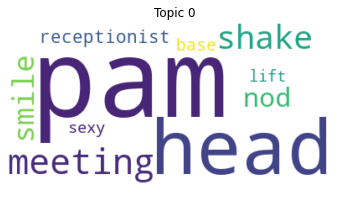

[('time', 0.20002408), ('home', 0.069864206), ('joke', 0.04473681), ('bring', 0.043731716), ('thought', 0.042726617), ('nope', 0.03066547), ('hospital', 0.025639992), ('early', 0.020111967), ('ride', 0.01659413), ('forget', 0.013578843)]


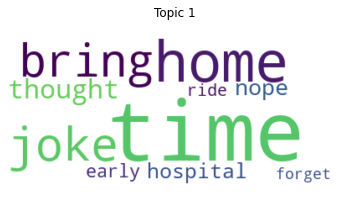

[('listen', 0.09626308), ('dunder', 0.07563754), ('mifflin', 0.06929123), ('change', 0.050781127), ('important', 0.048665687), ('employee', 0.03227103), ('special', 0.019578395), ('air', 0.019049533), ('price', 0.016405234), ('announcement', 0.012703215)]


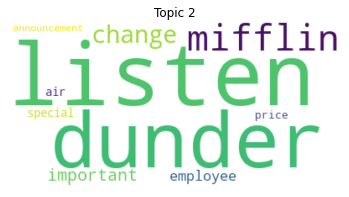

[('people', 0.28894353), ('turn', 0.104651056), ('kind', 0.033849422), ('machine', 0.02187562), ('scar', 0.016669618), ('imagine', 0.015628418), ('reach', 0.014587217), ('yell', 0.013025417), ('beer', 0.010422415), ('experience', 0.009901815)]


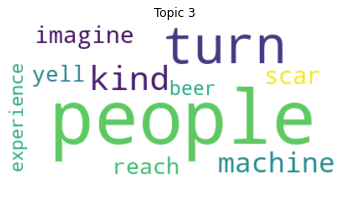

[('oscar', 0.11214868), ('idea', 0.105012596), ('stand', 0.06474468), ('david', 0.047414187), ('lady', 0.044865586), ('seat', 0.030593418), ('wallace', 0.025496213), ('gay', 0.023457332), ('chance', 0.02192817), ('gentleman', 0.02039901)]


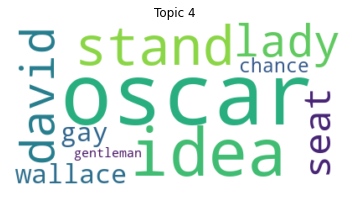

[('year', 0.13876863), ('hold', 0.12716338), ('hour', 0.06106385), ('half', 0.029780107), ('couple', 0.0277618), ('table', 0.025238918), ('weird', 0.020193152), ('spend', 0.019688576), ('record', 0.018679423), ('day', 0.017165693)]


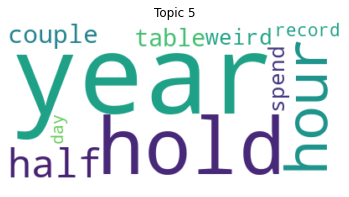

[('time', 0.10042949), ('door', 0.08034565), ('open', 0.07056122), ('close', 0.05717199), ('erin', 0.040692944), ('month', 0.03760312), ('knock', 0.0293636), ('shut', 0.024213899), ('glass', 0.020609107), ('past', 0.017004317)]


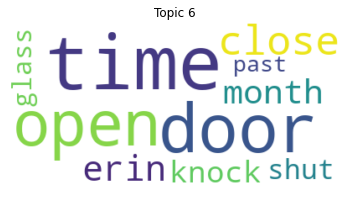

[('thing', 0.11538342), ('watch', 0.06157714), ('bit', 0.061059773), ('hear', 0.036226105), ('cat', 0.030017693), ('personal', 0.029500324), ('pretty', 0.02536138), ('video', 0.023291908), ('tape', 0.021222437), ('ear', 0.019152964)]


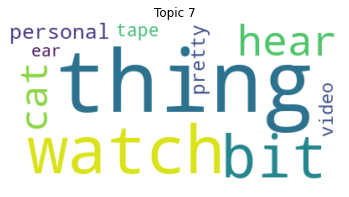

[('wait', 0.14124012), ('today', 0.070885845), ('stay', 0.0521247), ('morning', 0.043786418), ('stupid', 0.040659558), ('tomorrow', 0.029715562), ('late', 0.021377278), ('doctor', 0.01825042), ('excellent', 0.013560136), ('hair', 0.013038993)]


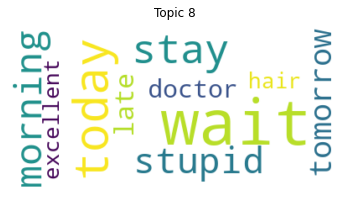

[('play', 0.09560086), ('fine', 0.08977805), ('hot', 0.05629688), ('game', 0.054841176), ('clear', 0.038828447), ('throat', 0.030579465), ('dog', 0.028153293), ('roll', 0.026697591), ('water', 0.01747814), ('bottle', 0.015051968)]


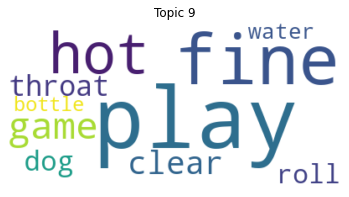

[('big', 0.1458113), ('deal', 0.04826836), ('client', 0.03646053), ('house', 0.03646053), ('grab', 0.032353457), ('suck', 0.024652697), ('surprise', 0.021572394), ('decision', 0.016438555), ('tough', 0.013358251), ('catch', 0.012844867)]


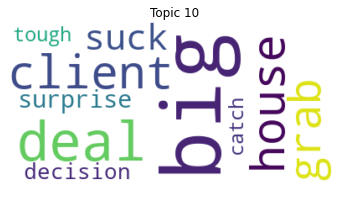

[('dwight', 0.48070684), ('schrute', 0.048230413), ('dwights', 0.03768221), ('chair', 0.036677618), ('hug', 0.024622526), ('horrible', 0.0125674335), ('cut', 0.009051366), ('purse', 0.009051366), ('knife', 0.0065398877), ('immediately', 0.0065398877)]


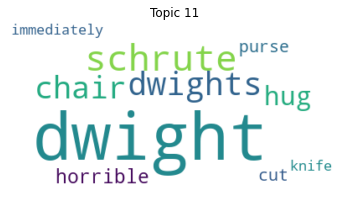

[('room', 0.134645), ('minute', 0.060697854), ('voice', 0.05763797), ('break', 0.056108028), ('conference', 0.05355813), ('follow', 0.0362188), ('leaf', 0.0362188), ('whisper', 0.027039155), ('normal', 0.01734953), ('key', 0.015309609)]


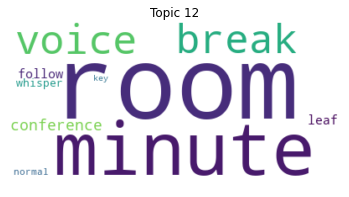

[('jim', 0.4238543), ('pam', 0.08932012), ('kiss', 0.04088078), ('packer', 0.02271603), ('halpert', 0.022211455), ('todd', 0.011110773), ('lean', 0.011110773), ('whisper', 0.0095970435), ('key', 0.009092467), ('quietly', 0.009092467)]


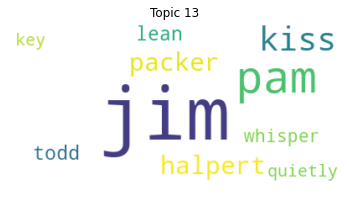

[('kid', 0.10484416), ('stuff', 0.064363785), ('night', 0.06280685), ('remember', 0.043604624), ('karen', 0.040490746), ('pretty', 0.02855423), ('cry', 0.024402397), ('easy', 0.02336444), ('promise', 0.02232648), ('type', 0.01713669)]


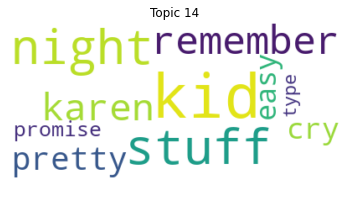

[('face', 0.090018116), ('hit', 0.058904577), ('wedding', 0.04501461), ('crazy', 0.042792216), ('suppose', 0.04056982), ('sex', 0.037791826), ('hell', 0.030569043), ('wheres', 0.021123866), ('pant', 0.01890147), ('cold', 0.017234674)]


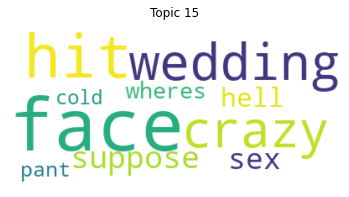

[('car', 0.10498981), ('office', 0.095948495), ('run', 0.07083371), ('check', 0.06631306), ('drive', 0.043709755), ('parking', 0.031654663), ('fall', 0.031654663), ('inside', 0.024622528), ('sigh', 0.022613345), ('window', 0.019097276)]


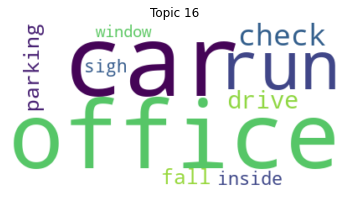

[('work', 0.24717908), ('sound', 0.055982083), ('hard', 0.054496095), ('start', 0.05350544), ('perfect', 0.02824366), ('busy', 0.021309055), ('foot', 0.019823069), ('egg', 0.019823069), ('bed', 0.017841753), ('ridiculous', 0.01338379)]


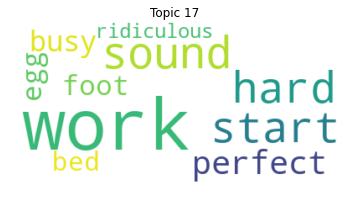

[('jan', 0.12230273), ('wrong', 0.06772586), ('wan', 0.057619028), ('miss', 0.04902822), ('heart', 0.047006857), ('family', 0.044480152), ('guess', 0.042458788), ('lose', 0.036900032), ('hurt', 0.023761153), ('strong', 0.01517035)]


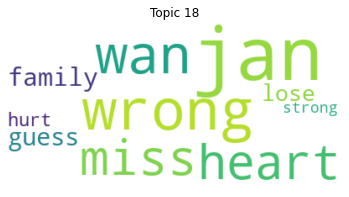

[('paper', 0.124413066), ('company', 0.076975204), ('sign', 0.04551131), ('line', 0.034861993), ('dollar', 0.03340981), ('speak', 0.025180794), ('pizza', 0.025180794), ('small', 0.020824257), ('bought', 0.018888017), ('art', 0.017435838)]


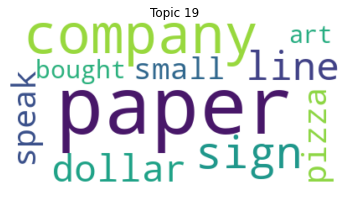

[('place', 0.0984364), ('business', 0.080077104), ('holly', 0.067327596), ('high', 0.052028187), ('school', 0.037238758), ('terrible', 0.028569097), ('cut', 0.023979273), ('charge', 0.023469293), ('end', 0.013779667), ('fly', 0.013269687)]


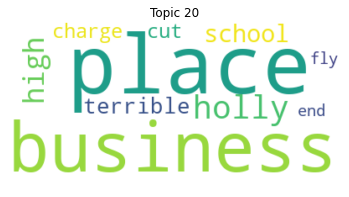

[('andy', 0.105971165), ('mind', 0.039367057), ('sell', 0.036844175), ('buy', 0.032807563), ('blow', 0.025743494), ('win', 0.024229765), ('ahead', 0.021706881), ('sort', 0.019183999), ('dress', 0.018679423), ('boy', 0.017165693)]


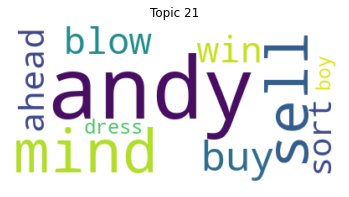

[('michael', 0.54763126), ('scott', 0.06935904), ('dance', 0.01579255), ('shout', 0.011009827), ('jan', 0.00957501), ('stare', 0.007183649), ('lip', 0.007183649), ('wave', 0.0067053773), ('mmhmm', 0.0062271045), ('famous', 0.0057488326)]


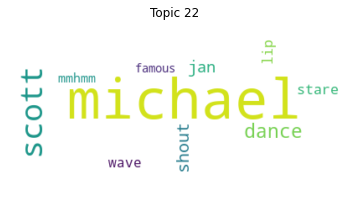

[('manager', 0.069905296), ('wear', 0.044680107), ('number', 0.035220664), ('fire', 0.03364409), ('meet', 0.02786332), ('regional', 0.026286745), ('act', 0.025235696), ('assistant', 0.023659123), ('single', 0.022608073), ('understand', 0.022608073)]


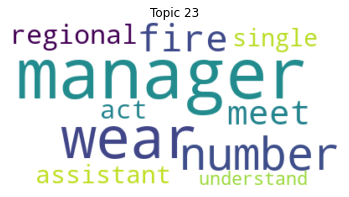

[('phyllis', 0.12912215), ('awesome', 0.03228861), ('ball', 0.02959879), ('idiot', 0.02852286), ('cake', 0.02852286), ('secret', 0.026371004), ('santa', 0.022605253), ('piece', 0.022605253), ('drop', 0.020453397), ('kick', 0.019377468)]


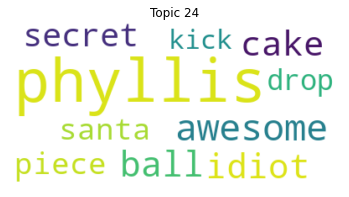

[('love', 0.1859325), ('man', 0.16391534), ('woman', 0.09150334), ('bos', 0.05627587), ('men', 0.017134247), ('scream', 0.014198625), ('tv', 0.014198625), ('broke', 0.0127308145), ('felt', 0.011752274), ('pain', 0.010284463)]


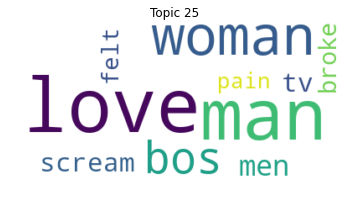

[('life', 0.11835003), ('today', 0.07027462), ('mom', 0.03804825), ('bathroom', 0.035406742), ('true', 0.03170864), ('case', 0.027482226), ('bag', 0.02484072), ('dad', 0.023255816), ('rest', 0.020614311), ('father', 0.019029409)]


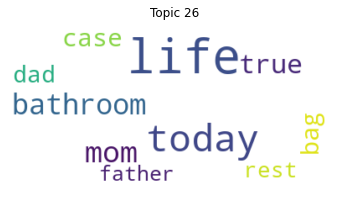

[('happen', 0.08091077), ('long', 0.07186273), ('girl', 0.070798256), ('kelly', 0.068137065), ('story', 0.029815953), ('beautiful', 0.029283715), ('blah', 0.022364626), ('beep', 0.018106725), ('share', 0.018106725), ('explain', 0.017574487)]


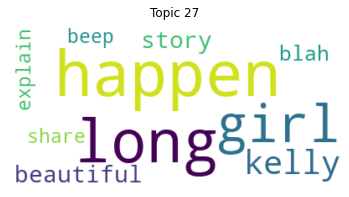

[('friend', 0.12532558), ('money', 0.06143911), ('cool', 0.06143911), ('pay', 0.0383417), ('bad', 0.035393097), ('save', 0.033427358), ('week', 0.032935925), ('move', 0.030970188), ('live', 0.030970188), ('anymore', 0.023598673)]


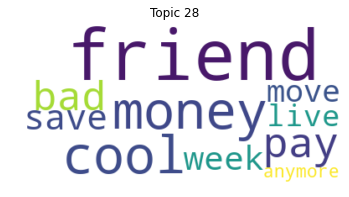

[('party', 0.11907787), ('tonight', 0.053540513), ('darryl', 0.043034527), ('christmas', 0.043034527), ('plan', 0.042534243), ('em', 0.03352911), ('warehouse', 0.025024261), ('invite', 0.025024261), ('star', 0.022522839), ('dinner', 0.022022553)]


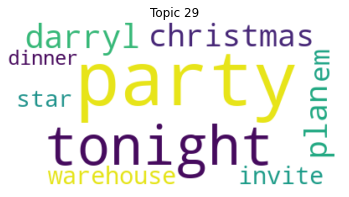

[('give', 0.07222615), ('person', 0.06126921), ('movie', 0.049316183), ('start', 0.045829885), ('gift', 0.035869032), ('sing', 0.035869032), ('favorite', 0.01843754), ('steal', 0.017939497), ('pum', 0.017939497), ('song', 0.016943412)]


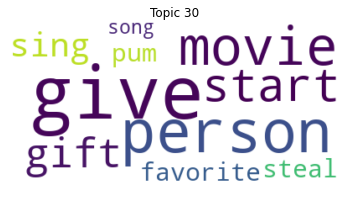

[('laugh', 0.16538104), ('meredith', 0.08060246), ('happy', 0.067519344), ('date', 0.065949365), ('birthday', 0.046586357), ('funny', 0.040829785), ('creed', 0.026176697), ('ice', 0.022513425), ('cream', 0.019373478), ('kinda', 0.012046933)]


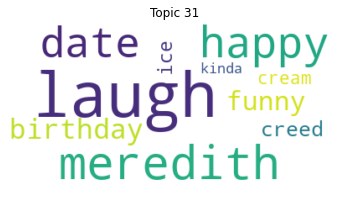

[('hand', 0.1496941), ('toby', 0.10750129), ('raise', 0.055262554), ('order', 0.033663843), ('cover', 0.02663171), ('clap', 0.026129413), ('sigh', 0.019097276), ('file', 0.017590389), ('join', 0.016083503), ('report', 0.014576617)]


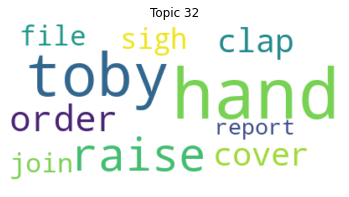

[('feel', 0.13408385), ('whoa', 0.041223664), ('reason', 0.035485115), ('matter', 0.034963425), ('child', 0.028181504), ('respect', 0.025573071), ('moment', 0.021921268), ('weird', 0.021921268), ('donna', 0.020356208), ('ho', 0.01983452)]


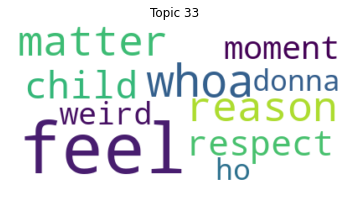

[('phone', 0.19057354), ('call', 0.095548734), ('hang', 0.055997863), ('ring', 0.04469762), ('answer', 0.03750655), ('number', 0.028260894), ('cell', 0.027747246), ('bye', 0.024151713), ('message', 0.023638064), ('transfer', 0.016446998)]


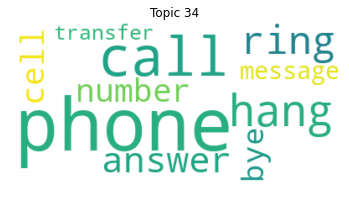

[('job', 0.11689537), ('nice', 0.08282579), ('word', 0.051376935), ('learn', 0.048756197), ('book', 0.031459335), ('worry', 0.027790299), ('offer', 0.025169563), ('jo', 0.018355645), ('free', 0.01730735), ('teach', 0.01573491)]


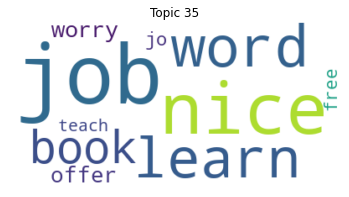

[('picture', 0.05036609), ('card', 0.049862526), ('read', 0.043316245), ('pick', 0.039287765), ('eye', 0.03777708), ('ha', 0.0337486), ('fact', 0.02468452), ('light', 0.0236774), ('king', 0.02166316), ('note', 0.020152478)]


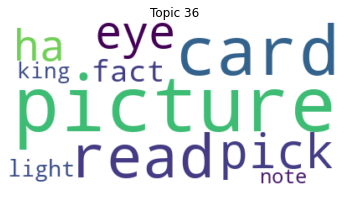

[('talk', 0.2407398), ('question', 0.057520635), ('problem', 0.052940156), ('list', 0.0341093), ('roy', 0.032582473), ('hear', 0.0244394), ('relationship', 0.020876806), ('figure', 0.020367865), ('sort', 0.01934998), ('buddy', 0.016296327)]


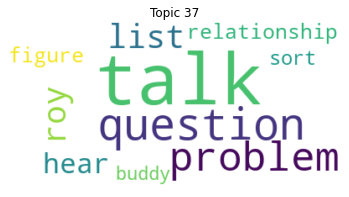

[('desk', 0.10156009), ('sit', 0.063229896), ('camera', 0.05924753), ('put', 0.051282816), ('jims', 0.03983354), ('box', 0.03585118), ('pams', 0.02738867), ('show', 0.02639308), ('floor', 0.024401901), ('arm', 0.022908516)]


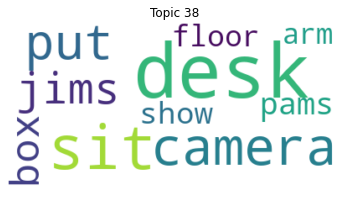

[('office', 0.15810208), ('walk', 0.13739355), ('leave', 0.08991545), ('thought', 0.063145876), ('blood', 0.020718636), ('goodbye', 0.016677946), ('yep', 0.015667774), ('guess', 0.015162688), ('fake', 0.014152515), ('hank', 0.012637257)]


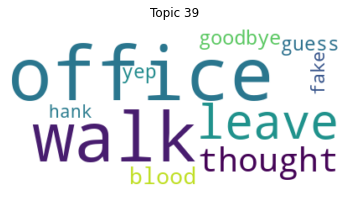

[('kevin', 0.09874576), ('throw', 0.059642397), ('end', 0.03813555), ('kill', 0.02787092), ('sick', 0.024938168), ('body', 0.023960585), ('gabe', 0.022494208), ('brought', 0.022005416), ('race', 0.016628705), ('huge', 0.015651122)]


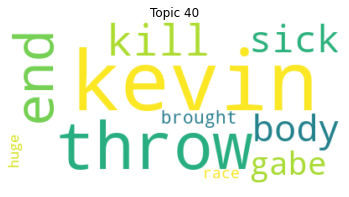

[('stop', 0.16101706), ('fun', 0.09854435), ('kind', 0.06349868), ('push', 0.029468836), ('prison', 0.01677113), ('pop', 0.014739497), ('town', 0.013723681), ('nice', 0.013215772), ('indian', 0.012707864), ('large', 0.012707864)]


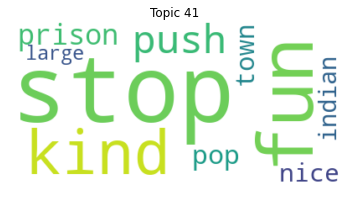

[('ryan', 0.14280596), ('sale', 0.08409542), ('attention', 0.035335794), ('lead', 0.032350514), ('news', 0.02438976), ('rule', 0.023394667), ('set', 0.019414289), ('fat', 0.019414289), ('office', 0.017424101), ('accounting', 0.014438818)]


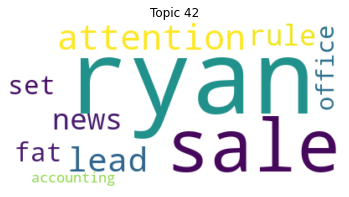

[('guy', 0.30527887), ('stanley', 0.12262218), ('real', 0.043403666), ('black', 0.027761798), ('white', 0.020697728), ('handle', 0.018174846), ('hero', 0.013129081), ('street', 0.012119927), ('martin', 0.010101621), ('belt', 0.010101621)]


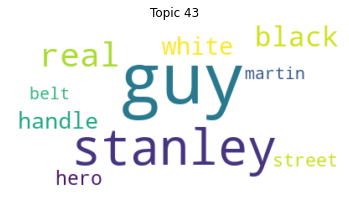

[('angela', 0.08779666), ('pull', 0.054377858), ('left', 0.051883917), ('start', 0.044900887), ('shoot', 0.028939676), ('mouth', 0.028939676), ('gun', 0.022455433), ('boom', 0.02095907), ('jump', 0.02095907), ('brain', 0.019961493)]


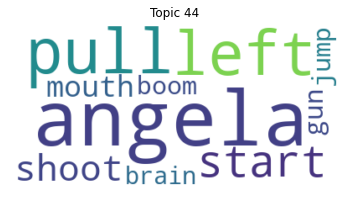

[('care', 0.07521177), ('eat', 0.06163375), ('hate', 0.04648904), ('food', 0.041788958), ('dead', 0.030822098), ('real', 0.026644249), ('mmm', 0.022466397), ('stick', 0.017766314), ('smell', 0.01672185), ('bear', 0.015677387)]


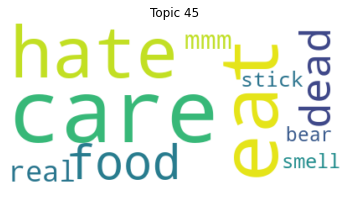

[('great', 0.21872832), ('god', 0.16442586), ('wow', 0.10107298), ('salesman', 0.037720103), ('hope', 0.034200497), ('team', 0.031183695), ('dream', 0.017608078), ('wonderful', 0.014088474), ('touch', 0.0125800725), ('son', 0.010066069)]


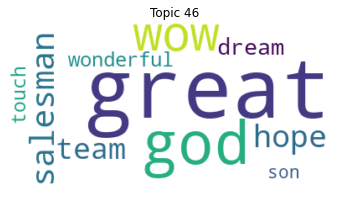

[('scranton', 0.060620207), ('die', 0.05018729), ('lunch', 0.044225626), ('corporate', 0.041244794), ('branch', 0.03925757), ('york', 0.033295903), ('fight', 0.02733424), ('coffee', 0.024850212), ('building', 0.024850212), ('excite', 0.024353405)]


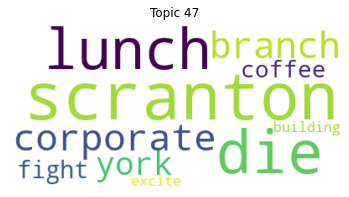

[('point', 0.10123813), ('write', 0.05850874), ('ready', 0.03663536), ('heard', 0.0264617), ('send', 0.02493565), ('world', 0.02493565), ('class', 0.021374868), ('wall', 0.0203575), ('trust', 0.018831452), ('drug', 0.01832277)]


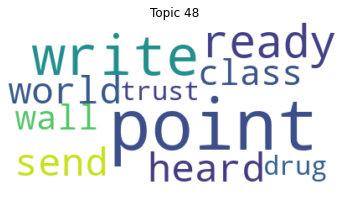

[('make', 0.11891831), ('baby', 0.09087888), ('beet', 0.022857321), ('hire', 0.022338074), ('sense', 0.02026108), ('finger', 0.02026108), ('farm', 0.019741831), ('mose', 0.017664837), ('begin', 0.016107092), ('ground', 0.015068593)]


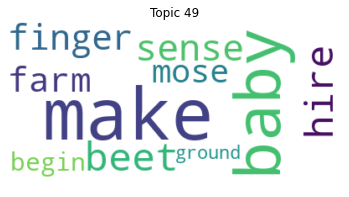

In [92]:
for i in range(0,50):
    create_wordcloud(ldagensim, 'wordcloud' + str(i+1), topic=i)

In [94]:
#find weight of each topic per row
#https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-3-ab03e01b7cd7
topic_weights_office = pd.DataFrame.from_records([{v: k for v, k in row} for row in theoffice_results])
topic_weights_office.columns = ['Topic ' + str(i) for i in range(1,51)]
topic_weights_office

Topic 1   Topic 2   Topic 3   Topic 4   Topic 5   Topic 6   Topic 7  \
0      0.018519  0.018519  0.018519  0.018519  0.018519  0.018519  0.018519   
1      0.019608  0.019608  0.019608  0.019608  0.019608  0.019608  0.039216   
2      0.018868  0.033543  0.018868  0.018868  0.018868  0.018868  0.018868   
3      0.020000  0.020000  0.020000  0.020000  0.020000  0.020000  0.020000   
4      0.012500  0.013889  0.048611  0.013889  0.027778  0.025000  0.015278   
...         ...       ...       ...       ...       ...       ...       ...   
14427  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608   
14428  0.019608  0.019608  0.019608  0.019608  0.019608  0.021786  0.019608   
14429  0.054750  0.014493  0.014493  0.016103  0.014493  0.014493  0.043478   
14430  0.017544  0.017544  0.017544  0.019493  0.019493  0.017544  0.017544   
14431  0.018868  0.018868  0.018868  0.018868  0.018868  0.018868  0.018868   

        Topic 8   Topic 9  Topic 10  Topic 11  Topic 12  Topic 13  Topic 14  \
0      0.034979  0.018519  0.018519  0.018519  0.018519  0.018519  0.037037   
1      0.019608  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608   
2      0.018868  0.020964  0.018868  0.018868  0.018868  0.018868  0.018868   
3      0.020000  0.020000  0.020000  0.020000  0.020000  0.020000  0.020000   
4      0.012500  0.012500  0.037500  0.045833  0.013889  0.025000  0.012500   
...         ...       ...       ...       ...       ...       ...       ...   
14427  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608   
14428  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608   
14429  0.020934  0.014493  0.014493  0.022544  0.016103  0.088567  0.014493   
14430  0.017544  0.017544  0.017544  0.017544  0.017544  0.031189  0.035088   
14431  0.018868  0.018868  0.018868  0.018868  0.018868  0.056604  0.018868   

       Topic 15  Topic 16  Topic 17  Topic 18  Topic 19  Topic 20  Topic 21  \
0      0.018519  0.018519  0.018519  0.018519  0.018519  0.018519  0.018519   
1      0.019608  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608   
2      0.018868  0.018868  0.018868  0.018868  0.018868  0.041929  0.018868   
3      0.020000  0.020000  0.020000  0.020000  0.020000  0.020000  0.020000   
4      0.012500  0.013889  0.013889  0.012500  0.012500  0.036111  0.027778   
...         ...       ...       ...       ...       ...       ...       ...   
14427  0.039216  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608   
14428  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608   
14429  0.014493  0.027375  0.016103  0.030596  0.014493  0.022544  0.014493   
14430  0.017544  0.017544  0.033138  0.035088  0.017544  0.019493  0.017544   
14431  0.018868  0.018868  0.018868  0.018868  0.035639  0.018868  0.018868   

       Topic 22  Topic 23  Topic 24  Topic 25  Topic 26  Topic 27  Topic 28  \
0      0.018519  0.018519  0.026749  0.018519  0.018519  0.018519  0.018519   
1      0.019608  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608   
2      0.018868  0.018868  0.018868  0.020964  0.018868  0.018868  0.018868   
3      0.020000  0.020000  0.020000  0.020000  0.020000  0.020000  0.020000   
4      0.012500  0.037500  0.050000  0.012500  0.029167  0.013889  0.013889   
...         ...       ...       ...       ...       ...       ...       ...   
14427  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608   
14428  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608  0.034858   
14429  0.017713  0.014493  0.014493  0.014493  0.014493  0.014493  0.043478   
14430  0.017544  0.017544  0.017544  0.017544  0.017544  0.017544  0.017544   
14431  0.018868  0.018868  0.018868  0.018868  0.018868  0.018868  0.018868   

       Topic 29  Topic 30  Topic 31  Topic 32  Topic 33  Topic 34  Topic 35  \
0      0.018519  0.018519  0.018519  0.018519  0.018519  0.018519  0.018519   
1      0.019608  0.019608  0.019608  0.019608  0.01960

In [95]:
#find dominant topic of the record
topic_weights_office['Dominant'] = topic_weights_office.idxmax(axis=1)
topic_weights_office

Topic 1   Topic 2   Topic 3   Topic 4   Topic 5   Topic 6   Topic 7  \
0      0.018519  0.018519  0.018519  0.018519  0.018519  0.018519  0.018519   
1      0.019608  0.019608  0.019608  0.019608  0.019608  0.019608  0.039216   
2      0.018868  0.033543  0.018868  0.018868  0.018868  0.018868  0.018868   
3      0.020000  0.020000  0.020000  0.020000  0.020000  0.020000  0.020000   
4      0.012500  0.013889  0.048611  0.013889  0.027778  0.025000  0.015278   
...         ...       ...       ...       ...       ...       ...       ...   
14427  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608   
14428  0.019608  0.019608  0.019608  0.019608  0.019608  0.021786  0.019608   
14429  0.054750  0.014493  0.014493  0.016103  0.014493  0.014493  0.043478   
14430  0.017544  0.017544  0.017544  0.019493  0.019493  0.017544  0.017544   
14431  0.018868  0.018868  0.018868  0.018868  0.018868  0.018868  0.018868   

        Topic 8   Topic 9  Topic 10  Topic 11  Topic 12  Topic 13  Topic 14  \
0      0.034979  0.018519  0.018519  0.018519  0.018519  0.018519  0.037037   
1      0.019608  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608   
2      0.018868  0.020964  0.018868  0.018868  0.018868  0.018868  0.018868   
3      0.020000  0.020000  0.020000  0.020000  0.020000  0.020000  0.020000   
4      0.012500  0.012500  0.037500  0.045833  0.013889  0.025000  0.012500   
...         ...       ...       ...       ...       ...       ...       ...   
14427  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608   
14428  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608   
14429  0.020934  0.014493  0.014493  0.022544  0.016103  0.088567  0.014493   
14430  0.017544  0.017544  0.017544  0.017544  0.017544  0.031189  0.035088   
14431  0.018868  0.018868  0.018868  0.018868  0.018868  0.056604  0.018868   

       Topic 15  Topic 16  Topic 17  Topic 18  Topic 19  Topic 20  Topic 21  \
0      0.018519  0.018519  0.018519  0.018519  0.018519  0.018519  0.018519   
1      0.019608  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608   
2      0.018868  0.018868  0.018868  0.018868  0.018868  0.041929  0.018868   
3      0.020000  0.020000  0.020000  0.020000  0.020000  0.020000  0.020000   
4      0.012500  0.013889  0.013889  0.012500  0.012500  0.036111  0.027778   
...         ...       ...       ...       ...       ...       ...       ...   
14427  0.039216  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608   
14428  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608   
14429  0.014493  0.027375  0.016103  0.030596  0.014493  0.022544  0.014493   
14430  0.017544  0.017544  0.033138  0.035088  0.017544  0.019493  0.017544   
14431  0.018868  0.018868  0.018868  0.018868  0.035639  0.018868  0.018868   

       Topic 22  Topic 23  Topic 24  Topic 25  Topic 26  Topic 27  Topic 28  \
0      0.018519  0.018519  0.026749  0.018519  0.018519  0.018519  0.018519   
1      0.019608  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608   
2      0.018868  0.018868  0.018868  0.020964  0.018868  0.018868  0.018868   
3      0.020000  0.020000  0.020000  0.020000  0.020000  0.020000  0.020000   
4      0.012500  0.037500  0.050000  0.012500  0.029167  0.013889  0.013889   
...         ...       ...       ...       ...       ...       ...       ...   
14427  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608   
14428  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608  0.034858   
14429  0.017713  0.014493  0.014493  0.014493  0.014493  0.014493  0.043478   
14430  0.017544  0.017544  0.017544  0.017544  0.017544  0.017544  0.017544   
14431  0.018868  0.018868  0.018868  0.018868  0.018868  0.018868  0.018868   

       Topic 29  Topic 30  Topic 31  Topic 32  Topic 33  Topic 34  Topic 35  \
0      0.018519  0.018519  0.018519  0.018519  0.018519  0.018519  0.018519   
1      0.019608  0.019608  0.019608  0.019608  0.01960

In [96]:
#revalue row index
the_office.index = range(14432)
the_office

Character  \
0      Michael    
1      Jim        
2      Michael    
3      Michael    
4      Michael    
...        ...    
14427  Jim        
14428  Jim        
14429  Jim        
14430  Dwight     
14431  Pam        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Line  \
0       All right Jim. Your quarterlies look very good. How are things at the library?                                                                                                                                                                                                                                                                                                                                                                                                                                      
1       Oh, I told you. I couldn’t close it. So…                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
2       So you’ve come to the master for guidance? Is this what you’re saying, grasshopper?                                                                                                                                                                                                                                                                                                                                                                                                                                 
3       All right. Well, let me show you how it’s done.                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
4       [on the phone] Yes, I’d like to speak to your office manager, please. Yes, hello. This is Michael Scott. I am the Regional Manager of Dunder Mifflin Paper Products. Just wanted to talk to you manager-a-manger. [quick cut scene] All right. Done deal. Thank you very much, sir. You’re a gentleman and a scholar. Oh, I’m sorry. OK. I’m sorry. My mistake. [hangs up] That was a woman I was talking to, so… She had a very low voice. Probably a smoker, so… [Clears throat] So that’s the way it’s done.     
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ...   
14427    What? No, no, it’s not a vote.                                                                                                                                                                               

In [97]:
#merge dataframes together
the_office['Dominant'] = topic_weights_office['Dominant']
the_office

Character  \
0      Michael    
1      Jim        
2      Michael    
3      Michael    
4      Michael    
...        ...    
14427  Jim        
14428  Jim        
14429  Jim        
14430  Dwight     
14431  Pam        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Line  \
0       All right Jim. Your quarterlies look very good. How are things at the library?                                                                                                                                                                                                                                                                                                                                                                                                                                      
1       Oh, I told you. I couldn’t close it. So…                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
2       So you’ve come to the master for guidance? Is this what you’re saying, grasshopper?                                                                                                                                                                                                                                                                                                                                                                                                                                 
3       All right. Well, let me show you how it’s done.                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
4       [on the phone] Yes, I’d like to speak to your office manager, please. Yes, hello. This is Michael Scott. I am the Regional Manager of Dunder Mifflin Paper Products. Just wanted to talk to you manager-a-manger. [quick cut scene] All right. Done deal. Thank you very much, sir. You’re a gentleman and a scholar. Oh, I’m sorry. OK. I’m sorry. My mistake. [hangs up] That was a woman I was talking to, so… She had a very low voice. Probably a smoker, so… [Clears throat] So that’s the way it’s done.     
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ...   
14427    What? No, no, it’s not a vote.                                                                                                                                                                               

In [98]:
#convert object to string
the_office['Line'] = the_office['Line'].astype(str)

In [99]:
#load VADER
analyzer = SentimentIntensityAnalyzer()

#Add VADER metrics to dataframe
the_office['compound'] = [analyzer.polarity_scores(v)['compound'] for v in the_office['Line']]
the_office['neg'] = [analyzer.polarity_scores(v)['neg'] for v in the_office['Line']]
the_office['neu'] = [analyzer.polarity_scores(v)['neu'] for v in the_office['Line']]
the_office['pos'] = [analyzer.polarity_scores(v)['pos'] for v in the_office['Line']]

the_office

Character  \
0      Michael    
1      Jim        
2      Michael    
3      Michael    
4      Michael    
...        ...    
14427  Jim        
14428  Jim        
14429  Jim        
14430  Dwight     
14431  Pam        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Line  \
0       All right Jim. Your quarterlies look very good. How are things at the library?                                                                                                                                                                                                                                                                                                                                                                                                                                      
1       Oh, I told you. I couldn’t close it. So…                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
2       So you’ve come to the master for guidance? Is this what you’re saying, grasshopper?                                                                                                                                                                                                                                                                                                                                                                                                                                 
3       All right. Well, let me show you how it’s done.                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
4       [on the phone] Yes, I’d like to speak to your office manager, please. Yes, hello. This is Michael Scott. I am the Regional Manager of Dunder Mifflin Paper Products. Just wanted to talk to you manager-a-manger. [quick cut scene] All right. Done deal. Thank you very much, sir. You’re a gentleman and a scholar. Oh, I’m sorry. OK. I’m sorry. My mistake. [hangs up] That was a woman I was talking to, so… She had a very low voice. Probably a smoker, so… [Clears throat] So that’s the way it’s done.     
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ...   
14427    What? No, no, it’s not a vote.                                                                                                                                                                               

In [100]:
#download data with topics and sentiment score
the_office.to_csv('the_office_lda_sentiment.csv', index = False)